引入所需資料

In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive') # 授權 Google Drive

Mounted at /content/drive


## **1. 5個reporter在280-1900波數範圍的資料視覺化(並進行預處理)**

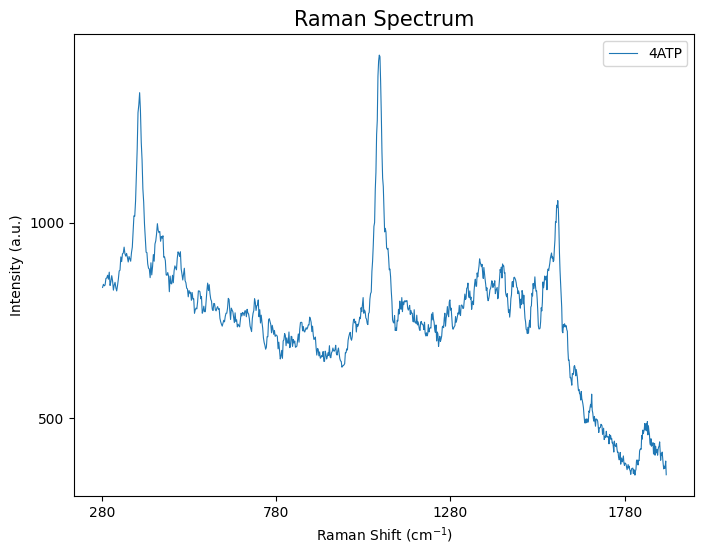

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import re

# 讀取資料檔案
data_file_path = "/content/drive/MyDrive/Lab/Senior_project/SERS bead data/1. 4ATP.txt"
data = []
with open(data_file_path, "r") as f:
  for line in f:
    try:
      data.append([float(x) for x in line.strip().split()])
    except ValueError:
      continue

# 將資料拆分為兩個列表
x = [row[0] for row in data if row[0] > 280 and row[0] < 1900]
y = [row[1] for row in data if row[0] > 280 and row[0] < 1900]

# 將 x 和 y 轉換為一維陣列
x = np.array(x)
y = np.array(y)

# 設定刻度和圖大小
fig, ax = plt.subplots()
ax.set_xticks(range(280, 1900, 500))
ax.set_yticks(range(0, 1800, 500))
fig.set_size_inches(8, 6)

# 視覺化
plt.plot(x, y, linewidth = 0.8, label = "4ATP")
plt.title("Raman Spectrum", fontsize=15)
plt.xlabel("Raman Shift (cm$^{-1}$)", fontsize=10)
plt.ylabel("Intensity (a.u.)", fontsize=10)
plt.legend()
plt.show()

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 載入資料夾中的所有檔案
folder_path = "/content/drive/MyDrive/Lab/Senior_project/SERS bead data"
files = os.listdir(folder_path)

# 建立空的資料儲存串列
label_raman_list_x = []
label_list_x = []
shift_list_x = []
intense_list_x = []
temp_shift_list_x = []
temp_intense_list_x = []
num = 0

for file in files:
  num += 1
  if file.endswith('.txt'):
    # 提取文件名中的ID
    label_raman = file.split('.')
    label_raman_list_x.append(label_raman)
    file_path = os.path.join(folder_path, file)
    with open(file_path, "r") as f:
      for line in f:
        try:
          data = [float(x) for x in line.strip().split()]
          if data[0] > 280 and data[0] < 1900:
            temp_shift_list_x.append(data[0])
            temp_intense_list_x.append(data[1])
        except ValueError:
          continue
      shift_list_x.append(temp_shift_list_x)
      temp_shift_list_x = []
      intense_list_x.append(temp_intense_list_x)
      temp_intense_list_x = []
label_id = [item[0] for item in label_raman_list_x]
label_type = [item[1] for item in label_raman_list_x]
print(label_id)
print(label_type)
print(intense_list_x)

# 將資料儲存在DataFrame
intense_df = pd.DataFrame(intense_list_x, columns=None)
id_df = pd.DataFrame(label_id, columns=['id'])
label_df = pd.DataFrame(label_type, columns=['label'])
# 合併三個dataframe
data1 = pd.concat([id_df, intense_df, label_df], axis=1)
print(data1)

# 將data1照id排序
all_data = data1.sort_values(by='id')
print(all_data)

# 儲存為 CSV 文件
all_data.to_csv('/content/drive/MyDrive/Lab/Senior_project/SERS bead data/uncorrected_data.csv', index=False)


['5', '4', '1', '3', '2']
[' ClTP', ' 3MBA', ' 4ATP', ' 4MBA', ' 4NTP']
[[360.0, 360.0, 355.0, 352.0, 361.0, 372.0, 395.0, 373.0, 382.0, 391.0, 414.0, 409.0, 421.0, 438.0, 433.0, 444.0, 447.0, 436.0, 439.0, 441.0, 444.0, 472.0, 512.0, 576.0, 675.0, 748.0, 752.0, 740.0, 651.0, 568.0, 481.0, 424.0, 406.0, 371.0, 386.0, 375.0, 375.0, 373.0, 362.0, 350.0, 338.0, 346.0, 349.0, 342.0, 334.0, 335.0, 329.0, 307.0, 322.0, 304.0, 302.0, 302.0, 330.0, 317.0, 307.0, 282.0, 287.0, 283.0, 287.0, 287.0, 281.0, 279.0, 292.0, 292.0, 293.0, 299.0, 295.0, 308.0, 303.0, 305.0, 305.0, 310.0, 303.0, 315.0, 314.0, 298.0, 312.0, 300.0, 304.0, 316.0, 312.0, 310.0, 312.0, 322.0, 317.0, 336.0, 347.0, 349.0, 351.0, 341.0, 354.0, 349.0, 354.0, 363.0, 362.0, 343.0, 379.0, 365.0, 387.0, 370.0, 389.0, 412.0, 427.0, 452.0, 454.0, 479.0, 522.0, 577.0, 667.0, 770.0, 848.0, 912.0, 874.0, 762.0, 656.0, 525.0, 484.0, 426.0, 407.0, 391.0, 383.0, 360.0, 347.0, 340.0, 338.0, 318.0, 316.0, 289.0, 311.0, 301.0, 319.0, 321.0, 30

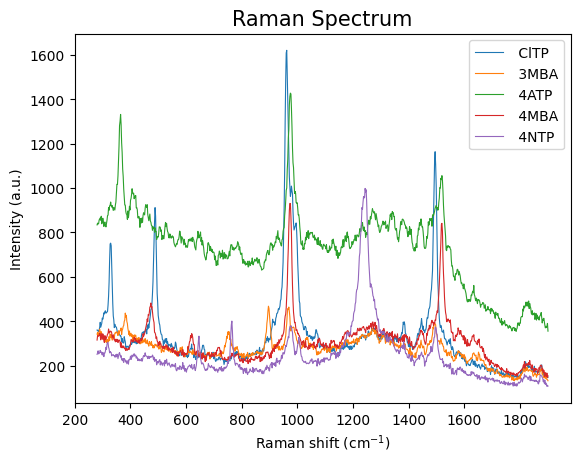

In [ ]:
# 繪製最初的拉曼光譜圖
num = 0
x_axis = np.linspace(280, 1900, 864)
for intense in intense_list_x:
    plt.plot(x_axis, intense, linewidth = 0.8, label = label_type[num])
    num += 1

plt.title("Raman Spectrum", fontsize=15)
plt.xlabel("Raman shift (cm$^{-1}$)", fontsize=10)
plt.ylabel("Intensity (a.u.)", fontsize=10)
plt.legend()
plt.show()

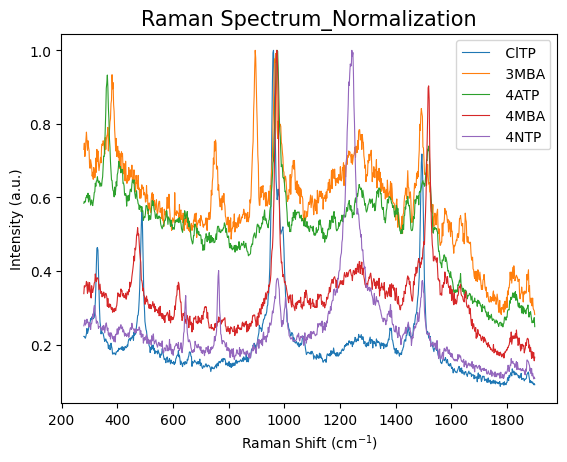

In [ ]:
import numpy as np

# 對光譜進行標準化
def normalize_spectrum(spectrum):
    max_intensity = np.max(spectrum)  # 獲取光譜中的最大强度值
    normalized_spectrum = spectrum / max_intensity  # 將光譜中的每個數據點除以最大强度值

    return normalized_spectrum

# 將每個資料標準化，並儲存到新的資料串列中
normalized_data_list_x = []
for data in intense_list_x:
    normalized_data = normalize_spectrum(data)
    normalized_data_list_x.append(normalized_data)

# 繪製標準化後的拉曼光譜圖
num = 0
x_axis = np.linspace(280, 1900, 864)
for normalized_data in normalized_data_list_x:
    plt.plot(x_axis, normalized_data, linewidth = 0.8, label = label_type[num])
    num += 1
plt.title("Raman Spectrum_Normalization", fontsize=15)
plt.xlabel("Raman Shift (cm$^{-1}$)", fontsize=10)
plt.ylabel("Intensity (a.u.)", fontsize=10)
plt.legend()
plt.show()

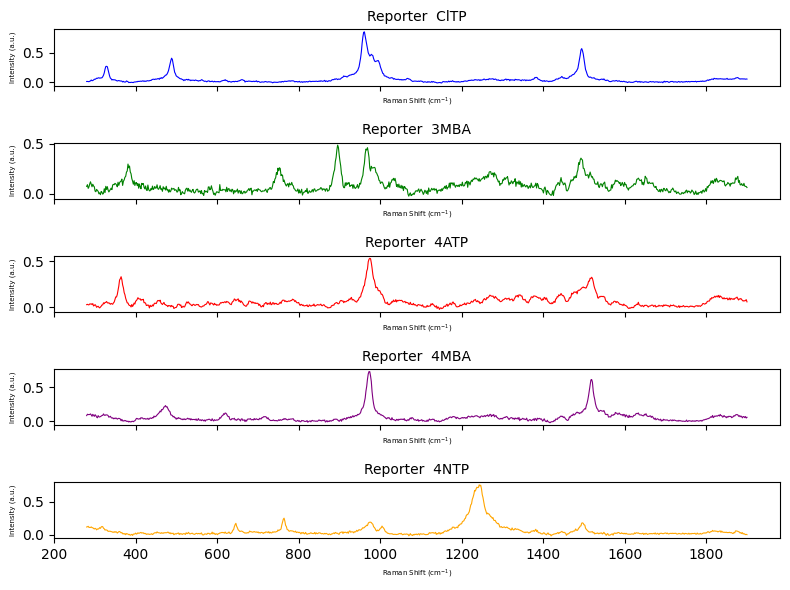

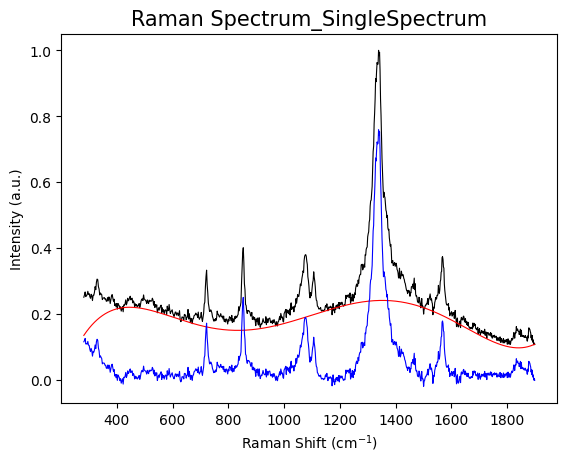

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# x：x_axis = np.linspace(300, 1800, 788)
# y：filter_data_list

# 多項式擬和
n = 5  # 多項式階數
num = 0

# 進行多項式擬和
baseline_data_list_x = []
for normalized_data in normalized_data_list_x:
  p0 = np.polyfit(x, normalized_data, n)
  y_fit0 = np.polyval(p0, x)

  # 計算殘差
  r0 = normalized_data - y_fit0
  dev0 = np.sqrt(np.sum((r0 - np.mean(r0))**2) / len(r0))

  # 峰值消除
  y_remove0 = normalized_data[normalized_data <= y_fit0]
  x_remove0 = x[normalized_data <= y_fit0]

  # 迭代
  i = 1
  judge = True
  while judge:
      p1 = np.polyfit(x_remove0, y_remove0, n)
      y_fit1 = np.polyval(p1, x_remove0)

      # 計算殘差
      r1 = y_remove0 - y_fit1
      dev = np.sqrt(np.sum((r1 - np.mean(r1))**2) / len(r1))

      # 判斷是否滿足迭代條件
      if i == 1:
          judge = abs(dev - dev0) / dev > 0.05
      else:
          judge = abs((dev - dev_prev) / dev) > 0.05

      # 更新迭代參數
      y_remove0[y_remove0 > y_fit1] = y_fit1[y_remove0 > y_fit1]
      i += 1
      dev_prev = dev

  # 計算基線
  y_baseline = np.polyval(p1, x)

  # 基線校正後的光譜，並儲存到新的資料串列中
  y_baseline_correction = normalized_data - y_baseline
  baseline_data_list_x.append(y_baseline_correction)

# 创建一个新的图形和轴对象
fig, axs = plt.subplots(len(baseline_data_list_x), 1, figsize=(8, 6), sharex=True)

# 设置x轴范围
x_axis = np.linspace(280, 1900, 864)

colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']


# 循环绘制每个baseline_data_data
for num, baseline_data_data in enumerate(baseline_data_list_x):
    axs[num].plot(x_axis, baseline_data_data, linewidth=0.8, color = colors[num])
    axs[num].set_title(f"Reporter {label_type[num]}", fontsize=10)
    axs[num].set_xlabel("Raman Shift (cm$^{-1}$)", fontsize=5)
    axs[num].set_ylabel("Intensity (a.u.)", fontsize=5)



# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

# 單一張圖效果
fig, ax = plt.subplots()
plt.plot(x, normalized_data, 'k', label='Original', linewidth = 0.8)
plt.plot(x, y_baseline, 'r', label='BaseLine', linewidth = 0.8)
plt.plot(x, y_baseline_correction, 'b', label='BaseLineCorrection', linewidth = 0.8)

plt.title("Raman Spectrum_SingleSpectrum", fontsize=15)
plt.xlabel("Raman Shift (cm$^{-1}$)", fontsize=10)
plt.ylabel("Intensity (a.u.)", fontsize=10)
plt.show()

np.save('/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/self_corrected_puredata_baseline_ver.npy',baseline_data_list_x)

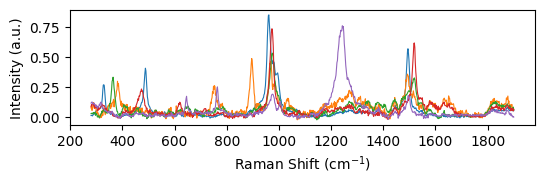

In [ ]:
# 繪製標準化後的拉曼光譜圖
num = 0
plt.figure(figsize=(6, 1.5))  # 设置图形大小为(2, 8)
x_axis = np.linspace(280, 1900, 864)
for baseline_data in baseline_data_list_x:
    plt.plot(x_axis, baseline_data, linewidth = 0.8, label = label_type[num])
    num += 1
# plt.title("Raman Spectrum_Baseline Corrected", fontsize=15)
plt.xlabel("Raman Shift (cm$^{-1}$)", fontsize=10)
plt.ylabel("Intensity (a.u.)", fontsize=10)
# plt.legend()
plt.show()

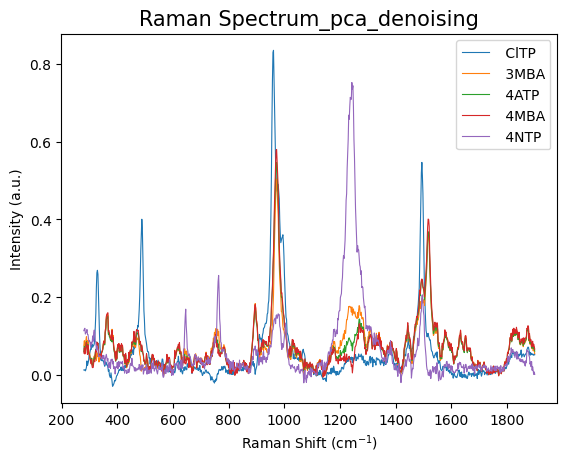

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

x_axis = np.linspace(280,1900,864)

# 將每個資料平滑，並儲存到新的資料串列中
denoising_data_list = []
baseline_data_matrix = np.array(baseline_data_list_x)
pca = PCA(n_components = 2)  # 選擇保留的主成分數量
pca.fit(baseline_data_matrix)
pca_denoising_data_list = pca.inverse_transform(pca.transform(baseline_data_matrix))

# 繪製平滑後的拉曼光譜圖
num = 0
for denoising_data in pca_denoising_data_list:
    plt.plot(x_axis, denoising_data, linewidth = 0.8, label = label_type[num])
    num += 1

plt.xlabel("Raman Shift (cm$^{-1}$)", fontsize=10)
plt.ylabel("Intensity (a.u.)", fontsize=10)
plt.title("Raman Spectrum_pca_denoising", fontsize=15)
plt.legend()
plt.show()

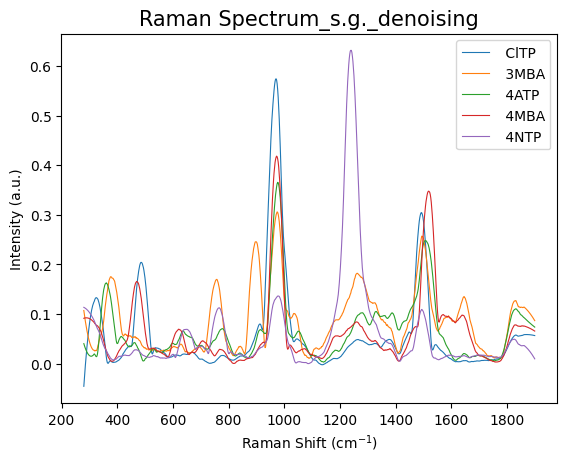

In [ ]:
from scipy.signal import savgol_filter

# 將每個資料平滑，並儲存到新的資料串列中
filter_data_list_x = []

for baseline_data in baseline_data_list_x:
    filter_data = savgol_filter(baseline_data, window_length=41, polyorder=2)
    filter_data_list_x.append(filter_data)

# 繪製平滑後的拉曼光譜圖
num = 0
x_axis = np.linspace(280, 1900, 864)
for filter_data in filter_data_list_x:
    plt.plot(x_axis, filter_data, linewidth = 0.8, label = label_type[num])
    num += 1
plt.title("Raman Spectrum_s.g._denoising", fontsize=15)
plt.xlabel("Raman Shift (cm$^{-1}$)", fontsize=10)
plt.ylabel("Intensity (a.u.)", fontsize=10)
plt.legend()
plt.show()

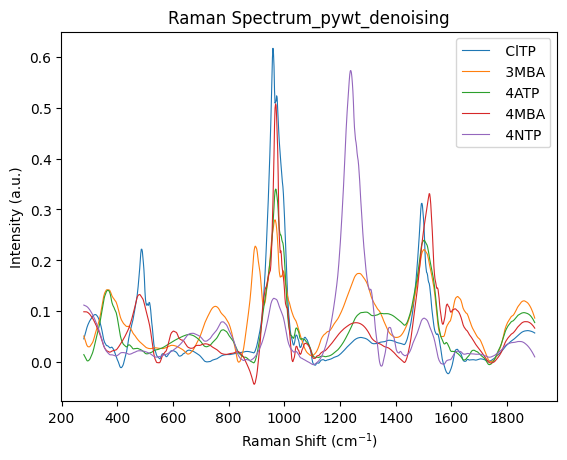

In [ ]:
import pywt

baseline_data_matrix = np.array(baseline_data_list_x)

wavelet = 'db4'  # 小波基函數
level = 5  # 小波轉換的層級

# 執行小波轉換
coeffs = pywt.wavedec(baseline_data_matrix, wavelet, level=level)

# 對每個層級的詳細係數進行閾值處理
threshold = np.std(coeffs[-level]) * np.sqrt(2 * np.log(len(baseline_data_matrix)))  # 根據訊號的標準差估計閾值
coeffs[1:] = (pywt.threshold(c, threshold) for c in coeffs[1:])

# 逆向小波轉換
pywt_denoising_data_list = pywt.waverec(coeffs, wavelet)

# 繪製平滑後的拉曼光譜圖
x_axis = np.linspace(280, 1900, 864)
num = 0
for denoising_data in pywt_denoising_data_list:
    plt.plot(x_axis, denoising_data, linewidth = 0.8, label = label_type[num])
    num += 1

plt.xlabel("Raman Shift (cm$^{-1}$)")
plt.ylabel("Intensity (a.u.)")
plt.legend()
plt.title("Raman Spectrum_pywt_denoising")
plt.show()

In [ ]:
np.save('/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/self_corrected_puredata_pca_ver.npy',pca_denoising_data_list)
np.save('/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/self_corrected_puredata_s_g_ver.npy',filter_data_list_x)
np.save('/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/self_corrected_puredata_pywt_ver.npy',pywt_denoising_data_list)

In [ ]:
# 將資料儲存在DataFrame
denoising_df = pd.DataFrame(pywt_denoising_data_list, columns=None)
id_df = pd.DataFrame(label_id, columns=['id'])
label_df = pd.DataFrame(label_type, columns=['label'])
# 合併三個dataframe
data1 = pd.concat([id_df, denoising_df, label_df], axis=1)
print(data1)

# 將data1照id排序
all_data = data1.sort_values(by='id')
print(all_data)

# 儲存為 CSV 文件
all_data.to_csv('/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3//self_corrected_puredata_pywt_ver.csv', index=False)

  id         0         1         2         3         4         5         6  \
0  5  0.045494  0.049086  0.052731  0.056415  0.060300  0.064340  0.067883   
1  4  0.051074  0.048028  0.044945  0.041834  0.038552  0.035139  0.032611   
2  1  0.014486  0.012509  0.010509  0.008494  0.006359  0.004133  0.002709   
3  3  0.098798  0.098755  0.098715  0.098679  0.098636  0.098590  0.098321   
4  2  0.111952  0.111505  0.111051  0.110592  0.110107  0.109601  0.108910   

          7         8  ...       855       856       857       858       859  \
0  0.070879  0.073605  ...  0.060781  0.060479  0.060139  0.059749  0.059305   
1  0.031055  0.030023  ...  0.107857  0.105789  0.103539  0.101129  0.098554   
2  0.002165  0.002105  ...  0.090798  0.089588  0.088220  0.086752  0.085183   
3  0.097804  0.097144  ...  0.076189  0.075349  0.074401  0.073361  0.072226   
4  0.108014  0.106994  ...  0.024535  0.022989  0.021372  0.019682  0.017919   

        860       861       862       863  label  

## **2. Datasets - training data (number of Samples, number of reporters, 2, number of features)**





**1.已知的20種，Y資料**

In [ ]:
import numpy as np
import pandas as pd

# 原始的光谱数据 spectrum_pure，假设它是一个包含多个光谱的NumPy数组

ratios = [
    [1.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 1.0],
    [0.33, 0.33, 0.0, 0.33, 0.0],
    [0.0, 0.0, 0.33, 0.33, 0.33],
    [0.17, 0.17, 0.33, 0.17, 0.17],
    [0.33, 0.0, 0.33, 0.33, 0.0],
    [0.20, 0.38, 0.20, 0.12, 0.10],
    [0.33, 0.17, 0.17, 0.17, 0.17],
    [0.17, 0.17, 0.17, 0.33, 0.17],
    [0.17, 0.17, 0.17, 0.17, 0.33],
    [0.0, 0.25, 0.0, 0.50, 0.25],
    [0.40, 0.0, 0.20, 0.0, 0.40],
    [0.20, 0.20, 0.20, 0.20, 0.20],
    [0.0, 0.0, 0.25, 0.25, 0.50],
    [0.20, 0.15, 0.25, 0.30, 0.10],
    [0.30, 0.0, 0.10, 0.50, 0.10],
    [0.30, 0.05, 0.25, 0.30, 0.10]
]

# 使用 np.array() 将列表转换为 NumPy 数组
ratio_np = np.array(ratios)

# 执行重塑操作
reshaped_ratio = ratio_np.reshape(20, 5, 1)
# print(reshaped_ratio)

# 進行擴增(20*100)
# 重复每个数据 100 次
repeated_data = np.repeat(reshaped_ratio, 100, axis=0)
print(repeated_data.shape)

np.save("/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/known_train_ratio.npy", repeated_data)

(2000, 5, 1)


**2.已知的20種ratio，X資料(2000,5,1,864)**

In [ ]:
pure_data = u'/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/self_corrected_puredata_baseline_ver.npy'
spectrum_pure = np.load(pure_data, allow_pickle=True)
spectrum_pure = np.array([sublist for sublist in spectrum_pure]) # 使用列表切片去掉每个子列表的第一个元素

# 执行重塑操作：(5,864)先reshape(5,1,864)
pure_re = spectrum_pure.reshape(5, 1, 864)
print(pure_re.shape)

# 执行重塑操作：(2000,5,1)先reshape(2000,5,1,1)
spectrum_ratio = repeated_data
ratio_re = spectrum_ratio.reshape(2000, 5, 1, 1)
print(pure_re.shape)

# 將(5,1,864)跟2000個(5,1,1)做相乘得2000個(5,1,864)，堆疊成(2000,5,1,864)

# 将 data2 拆分成 1000 个 (5, 1, 1) 的数组
split_ratio_re = np.split(ratio_re, ratio_re.shape[0], axis=0)
split_ratio_re = np.array(split_ratio_re)

# 初始化一个列表，用于存储迭代结果
result_list = []

# 迭代 2000 次
for _ in range(split_ratio_re.shape[0]):
    # 取出当前迭代的初始数据
    current_data = split_ratio_re[_]
    current_data = current_data.reshape(5, 1, 1)

    # 将当前数据与因子数据相乘
    multiplied_data = current_data * pure_re

    # 将结果添加到列表中
    result_list.append(multiplied_data)

print(multiplied_data.shape)

# 将结果列表堆叠成一个 NumPy 数组
final_result = np.stack(result_list)
print(final_result.shape)


(5, 1, 864)
(5, 1, 864)
(5, 1, 864)
(2000, 5, 1, 864)


修改一下，改成先(20,5,1,864)，再擴增平移成(1000,5,1,864)

In [ ]:
spectrum_pure = np.load(pure_data, allow_pickle=True)
spectrum_pure = np.array([sublist for sublist in spectrum_pure]) # 使用列表切片去掉每个子列表的第一个元素

# 执行重塑操作：(5,864)先reshape(5,1,864)
pure_re = spectrum_pure.reshape(5, 1, 864)
print(pure_re.shape)

# 执行重塑操作：(20,5,1)先reshape(20,5,1,1)
spectrum_ratio = reshaped_ratio
ratio_re = spectrum_ratio.reshape(20, 5, 1, 1)
print(pure_re.shape)

# 將(5,1,864)跟20個(5,1,1)做相乘得20個(5,1,864)，堆疊成(20,5,1,864)

# 将 data2 拆分成 20 个 (5, 1, 1) 的数组
split_ratio_re = np.split(ratio_re, ratio_re.shape[0], axis=0)
split_ratio_re = np.array(split_ratio_re)

# 初始化一个列表，用于存储迭代结果
result_list = []

# 迭代 20 次
for _ in range(split_ratio_re.shape[0]):
    # 取出当前迭代的初始数据
    current_data = split_ratio_re[_]
    current_data = current_data.reshape(5, 1, 1)

    # 将当前数据与因子数据相乘
    multiplied_data = current_data * pure_re

    # 将结果添加到列表中
    result_list.append(multiplied_data)

print(multiplied_data.shape)

# 将结果列表堆叠成一个 NumPy 数组
initial_data = np.stack(result_list)
print(initial_data.shape)
print(initial_data)


(5, 1, 864)
(5, 1, 864)
(5, 1, 864)
(20, 5, 1, 864)
[[[[ 1.24074300e-02  1.29497128e-02  1.04078162e-02 ...  5.11812656e-02
     5.49845039e-02  5.26204601e-02]]

  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -0.00000000e+00
     0.00000000e+00 -0.00000000e+00]]]


 [[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 7.43387277e-02  9.10738639e-02  5.43843825e-02 ...  7.42664425e-02
     7.30035813e-02  6.31778360e-02]]

  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0

[1. 0. 0. 0. 0.]


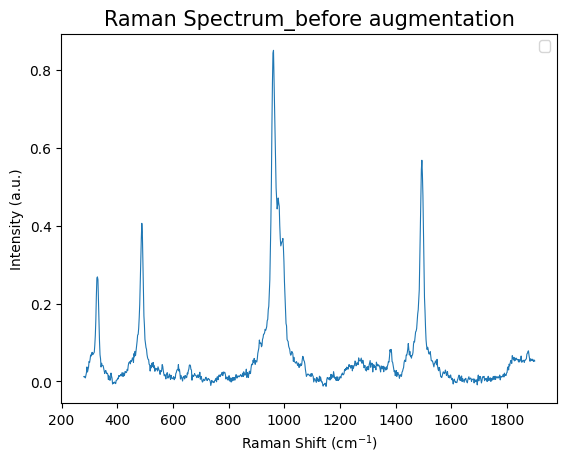

In [ ]:
num = 0
x_axis = np.linspace(280, 1900, 864)
print(ratio_np[0,:])
for initial_data_2 in initial_data:
    initial_data_2 = initial_data_2.reshape(5,864)
    data = np.dot(ratio_np[num,:], initial_data_2)
    plt.plot(x_axis, data, linewidth = 0.8)
    num += 1
    if num == 1: break
plt.title("Raman Spectrum_before augmentation", fontsize=15)
plt.xlabel("Raman Shift (cm$^{-1}$)", fontsize=10)
plt.ylabel("Intensity (a.u.)", fontsize=10)
plt.legend()
plt.show()

In [ ]:
import numpy as np

# 設置隨機數生成器的種子為隨機值
np.random.seed(None)

# 初始化一個列表，用於存儲迭代結果
result_list = []

# 定義光譜的長度
spectral_length = initial_data.shape[-1]

# 迭代 20 次，對每個初始數據進行處理
for sample_idx in range(initial_data.shape[0]):
    sample_data = initial_data[sample_idx]  # 當前樣本的數據
    sample_data = sample_data.astype(float)

    # 初始化一個列表，用於存儲每次處理後的結果
    augmented_spectrum_list = []

    # 對當前樣本的數據進行處理，重複 1000 次
    for _ in range(1000):
        # 隨機生成一組隨機噪聲，強度在 [0, 1] 範圍內
        random_noise = np.random.uniform(0, 0.5, size=spectral_length)

        # 隨機生成信噪比 (SNR) 比例，範圍可以根據需要進行調整
        snr_ratio = np.random.uniform(0.01, 0.2)

        # 計算信號部分，即原始光譜乘以 SNR 比例
        noise = random_noise * snr_ratio

        # 將隨機噪聲疊加到信號中
        if snr_ratio < 0.1:
            noisy_spectrum = sample_data - noise
        else:
            noisy_spectrum = sample_data + noise

        # 將處理後的數據添加到列表中
        augmented_spectrum_list.append(noisy_spectrum)

    # 將當前樣本的處理結果堆疊成一個數組
    stacked_result = np.stack(augmented_spectrum_list)

    # 將當前樣本的處理結果添加到最終列表中
    result_list.append(stacked_result)

# 將結果列表堆疊成一個 NumPy 數組
final_result = np.concatenate([item for item in result_list], axis=0)

print(final_result.shape)
print(final_result)

(20000, 5, 1, 864)
[[[[0.03268867 0.02123608 0.02841044 ... 0.06219771 0.07698116
    0.05635494]]

  [[0.02028124 0.00828637 0.01800262 ... 0.01101644 0.02199666
    0.00373448]]

  [[0.02028124 0.00828637 0.01800262 ... 0.01101644 0.02199666
    0.00373448]]

  [[0.02028124 0.00828637 0.01800262 ... 0.01101644 0.02199666
    0.00373448]]

  [[0.02028124 0.00828637 0.01800262 ... 0.01101644 0.02199666
    0.00373448]]]


 [[[0.03866486 0.06586148 0.01200128 ... 0.10182888 0.09201084
    0.06865088]]

  [[0.02625743 0.05291176 0.00159346 ... 0.05064762 0.03702634
    0.01603042]]

  [[0.02625743 0.05291176 0.00159346 ... 0.05064762 0.03702634
    0.01603042]]

  [[0.02625743 0.05291176 0.00159346 ... 0.05064762 0.03702634
    0.01603042]]

  [[0.02625743 0.05291176 0.00159346 ... 0.05064762 0.03702634
    0.01603042]]]


 [[[0.05141276 0.06646966 0.03229761 ... 0.07160779 0.07828084
    0.0653798 ]]

  [[0.03900533 0.05351994 0.02188979 ... 0.02042653 0.02329634
    0.01275934]]

  [[0

In [ ]:
# 保存最终數據
np.save("/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/known_train_data.npy", final_result)

(100, 5, 1, 864)


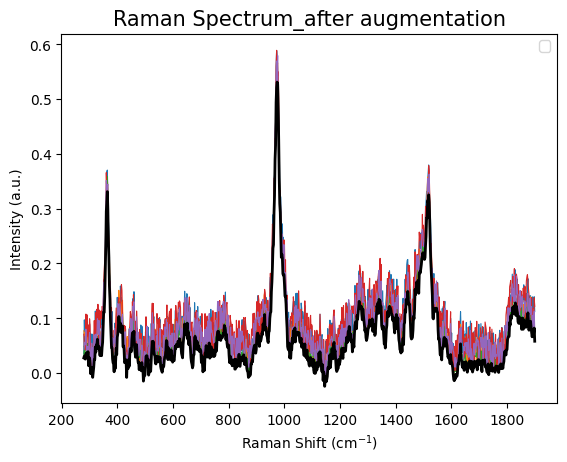

In [ ]:
num = 0
x_axis = np.linspace(280, 1900, 864)
print(final_result[2000:2100,:,:,:].shape)
for arugment__data in final_result[2000:2100,:,:,:]:
    arugment__data = arugment__data.reshape(5,864)
    data = np.dot(ratio_np[2,:], arugment__data)
    plt.plot(x_axis, data, linewidth = 0.8)
    num += 1
    if num == 5: break

initial_data_2 = initial_data[2,:,:].reshape(5,864)
data_2 = np.dot(ratio_np[2,:], initial_data_2)
plt.plot(x_axis, data_2, linewidth = 2, color = 'black')

plt.title("Raman Spectrum_after augmentation", fontsize=15)
plt.xlabel("Raman Shift (cm$^{-1}$)", fontsize=10)
plt.ylabel("Intensity (a.u.)", fontsize=10)
plt.legend()
plt.show()

**3.未知的20種ratio，X資料(1000,5,1,864)**

In [ ]:
import numpy as np
# 原始的光譜數據 spectrum_mix，假設它是一個包含多個光譜的NumPy數組

# 定義生成比例的函數
def generate_random_ratios(num_components):
    # 生成隨機的比例，確保它們加起來等於1
    random_ratios = np.random.dirichlet(np.ones(num_components), size=1)[0]

    # 將比例保留小數點後兩位並四捨五入
    rounded_ratios = np.round(random_ratios, 2)

    # 正規化確保比例加起來仍然等於1（四捨五入可能會導致總和稍有偏差）
    rounded_ratios /= np.sum(rounded_ratios)

    return rounded_ratios

# 指定成分的數量
num_components = 5

# 生成20個不同的比例
random_ratios_list = [generate_random_ratios(num_components) for _ in range(20)]

random_ratios_np = np.array(random_ratios_list)

"""
print(random_ratios_np)
"""
# 打印生成的比例
for i, ratios in enumerate(random_ratios_list):
    print(f"Random Ratios {i + 1}: {ratios}")


Random Ratios 1: [0.2020202  0.36363636 0.08080808 0.16161616 0.19191919]
Random Ratios 2: [0.04 0.39 0.11 0.14 0.32]
Random Ratios 3: [0.05 0.35 0.42 0.03 0.15]
Random Ratios 4: [0.15 0.19 0.1  0.18 0.38]
Random Ratios 5: [0.35 0.1  0.25 0.03 0.27]
Random Ratios 6: [0.14851485 0.31683168 0.0990099  0.41584158 0.01980198]
Random Ratios 7: [0.01 0.02 0.33 0.43 0.21]
Random Ratios 8: [0.17171717 0.15151515 0.33333333 0.06060606 0.28282828]
Random Ratios 9: [0.07070707 0.11111111 0.25252525 0.02020202 0.54545455]
Random Ratios 10: [0.08 0.12 0.49 0.06 0.25]
Random Ratios 11: [0.09090909 0.12121212 0.19191919 0.01010101 0.58585859]
Random Ratios 12: [0.00990099 0.2970297  0.03960396 0.34653465 0.30693069]
Random Ratios 13: [0.2  0.02 0.17 0.17 0.44]
Random Ratios 14: [0.02 0.2  0.02 0.24 0.52]
Random Ratios 15: [0.04 0.14 0.19 0.37 0.26]
Random Ratios 16: [0.33333333 0.22222222 0.15151515 0.01010101 0.28282828]
Random Ratios 17: [0.35353535 0.03030303 0.22222222 0.36363636 0.03030303]
Rand

In [ ]:
# 執行reshape
reshaped_ratio_2 = random_ratios_np.reshape(20, 5, 1)
# print(reshaped_ratio)

# 進行擴增(20*50)
# 重複每組資料 1000 次
repeated_ratio_2 = np.repeat(reshaped_ratio_2, 1000, axis=0)
print(repeated_ratio_2.shape)

np.save("/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/unknown_train_ratio.npy", repeated_ratio_2)

(20000, 5, 1)


In [ ]:
pure_data = u'/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/self_corrected_puredata_baseline_ver.npy'
spectrum_pure = np.load(pure_data, allow_pickle=True)
spectrum_pure = np.array([sublist for sublist in spectrum_pure])

# 執行 reshape 操作：(5, 864) 先 reshape 成 (5, 1, 864)
pure_re = spectrum_pure.reshape(5, 1, 864)
print(pure_re.shape)

# 執行 reshape 操作：(20, 5, 1) 先 reshape 成 (20, 5, 1, 1)
spectrum_ratio_2 = reshaped_ratio_2
ratio_re_2 = spectrum_ratio_2.reshape(20, 5, 1, 1)
print(ratio_re_2.shape)

# 將 (5, 1, 864) 與 20 個 (5, 1, 1) 做相乘得 20 個 (5, 1, 864)，堆疊成 (20, 5, 1, 864)

# 將 data2 拆分成 20 個 (5, 1, 1) 的數組
split_ratio_re_2 = np.split(ratio_re_2, ratio_re_2.shape[0], axis=0)
split_ratio_re_2 = np.array(split_ratio_re_2)

# 初始化一個列表，用於存儲迭代結果
result_list_2 = []

# 迭代 20 次
for _ in range(split_ratio_re_2.shape[0]):
    # 取出當前迭代的初始數據
    current_data = split_ratio_re_2[_]
    current_data = current_data.reshape(5, 1, 1)

    # 將當前數據與因子數據相乘
    multiplied_data = current_data * pure_re

    # 將結果添加到列表中
    result_list_2.append(multiplied_data)

# print(multiplied_data.shape)

# 將結果列表堆疊成一個 NumPy 數組
initial_data_2 = np.stack(result_list_2)
print(initial_data_2.shape)
# print(initial_data_2)

(5, 1, 864)
(20, 5, 1, 1)
(20, 5, 1, 864)


[0.2020202  0.36363636 0.08080808 0.16161616 0.19191919]
(5, 1, 864)


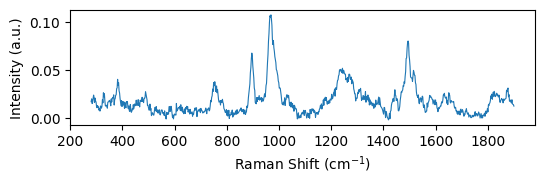

In [ ]:
num = 0
x_axis = np.linspace(280, 1900, 864)
plt.figure(figsize=(6, 1.5))
print(random_ratios_np[0,:])
for initial_data_3 in initial_data_2:
    print(initial_data_3.shape)
    initial_data_3 = initial_data_3.reshape(5,864)
    data = np.dot(random_ratios_np[num,:], initial_data_3)
    plt.plot(x_axis, data, linewidth = 0.8)
    num += 1
    if num == 1: break
#plt.ylim(0, 1)
# plt.title("Raman Spectrum_before arugmentation", fontsize=15)
plt.xlabel("Raman Shift (cm$^{-1}$)", fontsize=10)
plt.ylabel("Intensity (a.u.)", fontsize=10)
# plt.legend()
plt.show()

In [ ]:
# 設置隨機數生成器的種子為隨機值
np.random.seed(None)

# 初始化一個列表，用於存儲迭代結果
result_list_2 = []

# 定義光譜的長度
spectral_length = initial_data_2.shape[-1]

# 迭代 20 次，對每個初始數據進行處理
for sample_idx in range(initial_data_2.shape[0]):
    sample_data_2 = initial_data_2[sample_idx]  # 當前樣本的數據
    sample_data_2 = sample_data_2.astype(float)

    # 初始化一個列表，用於存儲每次處理後的結果
    augmented_spectrum_list = []

    # 對當前樣本的數據進行處理，重複 1000 次
    for _ in range(1000):
        # 隨機生成一組隨機噪聲，強度在 [0, 1] 範圍內
        random_noise = np.random.uniform(0, 0.5, size=spectral_length)

        # 隨機生成信噪比 (SNR) 比例，範圍可以根據需要進行調整
        snr_ratio = np.random.uniform(0.01, 0.2)

        # 計算信號部分，即原始光譜乘以 SNR 比例
        noise = random_noise * snr_ratio

        # 將隨機噪聲疊加到信號中
        if snr_ratio < 0.1:
            noisy_spectrum = sample_data_2 - noise
        else:
            noisy_spectrum = sample_data_2 + noise

        # 將處理後的數據添加到列表中
        augmented_spectrum_list.append(noisy_spectrum)


    # 將當前樣本的處理結果堆疊成一個數組
    stacked_result = np.stack(augmented_spectrum_list)

    # 將當前樣本的處理結果添加到最終列表中
    result_list_2.append(stacked_result)

# 將結果列表堆疊成一個 NumPy 數組
final_result_2 = np.concatenate([item for item in result_list_2], axis=0)

print(final_result_2.shape)
print(final_result_2)

# 保存最終數據
np.save("/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/unknown_train_data.npy", final_result_2)

(20000, 5, 1, 864)
[[[[ 2.11882273e-02  2.39985241e-02  1.70183087e-02 ...  4.25328133e-02
     3.69834023e-02  1.08530200e-02]]

  [[ 2.06898131e-02  2.37480473e-02  1.64407458e-02 ...  3.58291396e-02
     2.96459533e-02  3.69730306e-03]]

  [[ 2.88834125e-02  3.27864085e-02  2.44755311e-02 ...  5.97152144e-02
     5.69098354e-02  2.27418428e-02]]

  [[ 2.26035567e-02  2.61160212e-02  1.93450852e-02 ...  3.71835227e-02
     3.01572185e-02  4.82549293e-03]]

  [[ 6.89545102e-02  7.34143086e-02  6.94684209e-02 ...  3.40384909e-02
     2.97892200e-02  2.06236858e-03]]]


 [[[ 7.25964947e-02  5.32515227e-02  5.63342275e-03 ...  2.45732953e-02
     5.21304458e-02  4.66143389e-02]]

  [[ 7.20980805e-02  5.30010459e-02  5.05585980e-03 ...  1.78696217e-02
     4.47929968e-02  3.94586220e-02]]

  [[ 8.02916799e-02  6.20394071e-02  1.30906451e-02 ...  4.17556965e-02
     7.20568789e-02  5.85031617e-02]]

  [[ 7.40118241e-02  5.53690198e-02  7.96019923e-03 ...  1.92240048e-02
     4.53042620e-02

(100, 5, 1, 864)


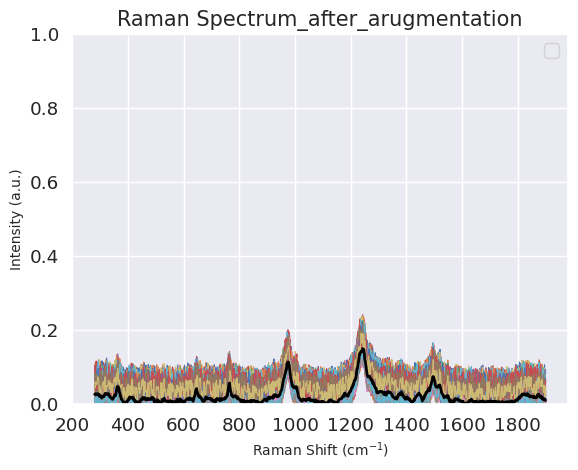

In [ ]:
num = 0
x_axis = np.linspace(280, 1900, 864)
print(final_result_2[:100,:,:,:].shape)
for arugment__data in final_result_2[:100,:,:,:]:
    arugment__data = arugment__data.reshape(5,864)
    data = np.dot(random_ratios_np[0,:], arugment__data)
    plt.plot(x_axis, data, linewidth = 0.8)
    num += 1
    # if num == 5: break

initial_data_3 = initial_data_2[0,:,:].reshape(5,864)
data_2 = np.dot(random_ratios_np[0,:], initial_data_3)
plt.plot(x_axis, data_2, linewidth = 2, color = 'black')

plt.ylim(0, 1)
plt.title("Raman Spectrum_after_arugmentation", fontsize=15)
plt.xlabel("Raman Shift (cm$^{-1}$)", fontsize=10)
plt.ylabel("Intensity (a.u.)", fontsize=10)
plt.legend()
plt.show()

**4.合併training資料(1000,5,2,864)**

In [ ]:
# 假設您有兩個形狀為 (2000, 5, 1, 864) 的數組 data1 和 data2
data1 = np.load("/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/known_train_data.npy", allow_pickle=True)
data2 = np.load("/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/unknown_train_data.npy", allow_pickle=True)

# 使用 np.concatenate() 將它們合併成一個形狀為 (2000, 5, 2, 864) 的數組
combined_data = np.concatenate((data1, data2), axis=2)
print(combined_data.dtype)
# print(combined_data[:,:,0,:])
combined_data = combined_data.astype(np.float64)
print(combined_data.dtype)
print(combined_data.shape)

np.save("/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/all_train_data.npy", combined_data)

# combined_data 的形狀為 (2000, 5, 2, 864)

float64
float64
(20000, 5, 2, 864)


## **3. Datasets - testing data (number of samples, number of features)**

In [ ]:
import numpy as np
# 原始的光譜數據 spectrum_mix，假設它是一個包含多個光譜的NumPy數組

# 定義生成比例的函數
def generate_random_ratios(num_components):
    # 生成隨機的比例，確保它們加起來等於1
    random_ratios = np.random.dirichlet(np.ones(num_components), size=1)[0]

    # 將比例保留小數點後兩位並四捨五入
    rounded_ratios = np.round(random_ratios, 2)

    # 規範化確保比例加起來仍然等於1（四捨五入可能會導致總和略有偏差）
    rounded_ratios /= np.sum(rounded_ratios)

    return rounded_ratios

# 指定成分的數量
num_components = 5

# 生成10個不同的比例
random_ratios_list_2 = [generate_random_ratios(num_components) for _ in range(10)]

random_ratios_np_2 = np.array(random_ratios_list_2)

# 打印生成的比例
for i, ratios in enumerate(random_ratios_list_2):
    print(f"Random Ratios {i + 1}: {ratios}")

print(random_ratios_np_2.shape)

np.save("/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/testing_unknown_ratio.npy", random_ratios_np_2)

Random Ratios 1: [0.41414141 0.08080808 0.03030303 0.26262626 0.21212121]
Random Ratios 2: [0.11881188 0.14851485 0.5049505  0.16831683 0.05940594]
Random Ratios 3: [0.12 0.37 0.07 0.19 0.25]
Random Ratios 4: [0.22 0.13 0.31 0.23 0.11]
Random Ratios 5: [0.33 0.12 0.12 0.06 0.37]
Random Ratios 6: [0.11 0.11 0.71 0.04 0.03]
Random Ratios 7: [0.1  0.29 0.41 0.16 0.04]
Random Ratios 8: [0.05050505 0.26262626 0.11111111 0.35353535 0.22222222]
Random Ratios 9: [0.00990099 0.03960396 0.23762376 0.36633663 0.34653465]
Random Ratios 10: [0.24 0.13 0.33 0.05 0.25]
(10, 5)


In [ ]:
data_001 = np.load("/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/testing_unknown_ratio.npy")

id_list = []
data_list_001 = []

for idx in range(10):
  # 創建新的ID
  new_id = f'mix {idx + 1}'
  data_list_001.append(data_001[idx])
  id_list.append(new_id)

id_df = pd.DataFrame(id_list, columns=['id'])
data_df = pd.DataFrame(data_list_001)
all_ratio_df = pd.concat([id_df, data_df], axis = 1)
print(all_ratio_df)

# 儲存為 CSV 文件
all_ratio_df.to_csv('/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/unknown_ratio_data.csv', index=False)

       id         0         1         2         3         4
0   mix 1  0.414141  0.080808  0.030303  0.262626  0.212121
1   mix 2  0.118812  0.148515  0.504950  0.168317  0.059406
2   mix 3  0.120000  0.370000  0.070000  0.190000  0.250000
3   mix 4  0.220000  0.130000  0.310000  0.230000  0.110000
4   mix 5  0.330000  0.120000  0.120000  0.060000  0.370000
5   mix 6  0.110000  0.110000  0.710000  0.040000  0.030000
6   mix 7  0.100000  0.290000  0.410000  0.160000  0.040000
7   mix 8  0.050505  0.262626  0.111111  0.353535  0.222222
8   mix 9  0.009901  0.039604  0.237624  0.366337  0.346535
9  mix 10  0.240000  0.130000  0.330000  0.050000  0.250000


In [ ]:
pure_data = u'/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/self_corrected_puredata_baseline_ver.npy'
spectrum_pure = np.load(pure_data, allow_pickle=True)
spectrum_pure = np.array([sublist for sublist in spectrum_pure])  # 使用列表切片去掉每個子列表的第一個元素（已進行預處理的不需做切片）

# pure：(5, 864)
print(spectrum_pure.shape)

# test_unknown_ratio：(10, 5)
spectrum_ratio_2 = data_001
print(spectrum_ratio_2.shape)

# 將(10, 5)跟(5, 864)相乘得(10, 864)

# 執行矩陣乘法操作，得到形狀為 (10, 864) 的結果矩陣
result_matrix = np.dot(spectrum_ratio_2, spectrum_pure)

print(result_matrix.shape)
print(result_matrix)

# 或者使用 matmul 函數
# result_matrix = np.matmul(matrix_a, matrix_b)

np.save("/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/testing_unknown_data_before.npy", result_matrix)

(5, 864)
(10, 5)
(10, 864)
[[0.05885302 0.06656843 0.0624005  ... 0.04788823 0.04489162 0.04417605]
 [0.04766303 0.05547414 0.04674895 ... 0.06562144 0.06733216 0.05494657]
 [0.07600803 0.08725789 0.0736202  ... 0.05200574 0.04965028 0.04489675]
 ...
 [0.07898951 0.09165661 0.0809541  ... 0.05508432 0.0493204  0.04664402]
 [0.080877   0.09097054 0.08862228 ... 0.04643448 0.04228349 0.03841608]
 [0.05494495 0.06035836 0.05462149 ... 0.04923188 0.05316568 0.04276343]]


In [ ]:
# 設置隨機數生成器的種子為隨機值
np.random.seed(None)

initial_data_3 = result_matrix

# 初始化一個列表，用於存儲迭代結果
result_list_3 = []

# 定義光譜的長度
spectral_length = initial_data_3.shape[-1]

# 迭代 10 次，對每個初始數據進行處理
for sample_idx in range(initial_data_3.shape[0]):
    sample_data_3 = initial_data_3[sample_idx]  # 當前樣本的數據
    sample_data_3 = sample_data_3.astype(float)

    # 初始化一個列表，用於存儲每次處理後的結果
    augmented_spectrum_list = []

    # 對當前樣本的數據進行處理，重複 1000 次
    for _ in range(1000):
        # 隨機生成一組隨機噪聲，強度在 [0, 1] 範圍內
        random_noise = np.random.uniform(0, 1, size=spectral_length)

        # 隨機生成信噪比 (SNR) 比例，範圍可以根據需要進行調整
        snr_ratio = np.random.uniform(0.0, 0.1)

        # 計算信號部分，即原始光譜乘以 SNR 比例
        noise = random_noise * snr_ratio

        # 將隨機噪聲疊加到信號中
        if snr_ratio < 0.05:
            noisy_spectrum = sample_data_3 - noise
        else:
            noisy_spectrum = sample_data_3 + noise

        # 將處理後的數據添加到列表中
        augmented_spectrum_list.append(noisy_spectrum)

    # 將當前樣本的處理結果堆疊成一個數組
    stacked_result_3 = np.stack(augmented_spectrum_list)

    # 將當前樣本的處理結果添加到最終列表中
    result_list_3.append(stacked_result_3)

# 將結果列表堆疊成一個 NumPy 數組
final_result_3 = np.concatenate([item for item in result_list_3], axis=0)

print(final_result_3.shape)
print(final_result_3)

# 保存最終數據
np.save("/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/testing_unknown_data.npy", final_result_3)

(10000, 864)
[[0.04912217 0.06355474 0.05685825 ... 0.04575314 0.04009018 0.03848496]
 [0.08353894 0.1147222  0.11388161 ... 0.07003303 0.07007604 0.07613794]
 [0.05437262 0.04368307 0.04190276 ... 0.03737164 0.04040881 0.04380454]
 ...
 [0.04411194 0.05725402 0.04194081 ... 0.03458292 0.03762118 0.02810437]
 [0.05132868 0.05818744 0.0365357  ... 0.04538272 0.01561984 0.02844329]
 [0.05671267 0.09537237 0.09637024 ... 0.14054894 0.14028606 0.12642943]]


==========================================================================================

In [ ]:
data_001 = np.load("/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/testing_unknown_ratio.npy")

id_list = []
data_list_001 = []

for idx in range(10):
  for _ in range(100):
    # 創建新的ID
    new_id = f'mix {idx + 1}'
    data_list_001.append(data_001[idx])
    id_list.append(new_id)

id_df = pd.DataFrame(id_list, columns=['id'])
data_df = pd.DataFrame(data_list_001)
all_ratio_df = pd.concat([id_df, data_df], axis = 1)
print(all_ratio_df)

# 儲存為 CSV 文件
all_ratio_df.to_csv('/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/lda_unknown_ratio_data.csv', index=False)

         id         0         1         2         3         4
0     mix 1  0.414141  0.080808  0.030303  0.262626  0.212121
1     mix 1  0.414141  0.080808  0.030303  0.262626  0.212121
2     mix 1  0.414141  0.080808  0.030303  0.262626  0.212121
3     mix 1  0.414141  0.080808  0.030303  0.262626  0.212121
4     mix 1  0.414141  0.080808  0.030303  0.262626  0.212121
..      ...       ...       ...       ...       ...       ...
995  mix 10  0.240000  0.130000  0.330000  0.050000  0.250000
996  mix 10  0.240000  0.130000  0.330000  0.050000  0.250000
997  mix 10  0.240000  0.130000  0.330000  0.050000  0.250000
998  mix 10  0.240000  0.130000  0.330000  0.050000  0.250000
999  mix 10  0.240000  0.130000  0.330000  0.050000  0.250000

[1000 rows x 6 columns]


In [ ]:
# 設置隨機數生成器的種子為隨機值
np.random.seed(None)

initial_data_3 = result_matrix

# 初始化一個列表，用於存儲迭代結果
result_list_4 = []

# 定義光譜的長度
spectral_length = initial_data_3.shape[-1]

# 迭代 10 次，對每個初始數據進行處理
for sample_idx in range(initial_data_3.shape[0]):
    sample_data_4 = initial_data_3[sample_idx]  # 當前樣本的數據
    sample_data_4 = sample_data_4.astype(float)

    # 初始化一個列表，用於存儲每次處理後的結果
    augmented_spectrum_list = []

    # 對當前樣本的數據進行處理，重複 100 次
    for _ in range(100):
        # 隨機生成一組隨機噪聲，強度在 [0, 1] 範圍內
        # random_noise = np.random.uniform(0, 1, size=spectral_length)

        # 隨機生成信噪比 (SNR) 比例，範圍可以根據需要進行調整
        snr_ratio = np.random.uniform(0.0, 0.5)

        # 計算信號部分，即原始光譜乘以 SNR 比例
        noise = sample_data_4 * snr_ratio

        # 將隨機噪聲疊加到信號中
        if snr_ratio < 0.25:
            noisy_spectrum = sample_data_4 - noise
        else:
            noisy_spectrum = sample_data_4 + noise

        # 將處理後的數據添加到列表中
        augmented_spectrum_list.append(noisy_spectrum)

    # 將當前樣本的處理結果堆疊成一個數組
    stacked_result_4 = np.stack(augmented_spectrum_list)

    # 將當前樣本的處理結果添加到最終列表中
    result_list_4.append(stacked_result_4)

# 將結果列表堆疊成一個 NumPy 數組
final_result_4 = np.concatenate([item for item in result_list_4], axis=0)

print(final_result_4.shape)
print(final_result_4)

# 保存最終數據
np.save("/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/lda_training_unknown_data.npy", final_result_4)


NameError: ignored

In [ ]:
# 創建一個新的DataFrame來存儲轉csv後的數據
new_data_list = []
new_id_list = []

# 迭代處理每一行光譜數據
for idx in range(1000):
    spectrum = final_result_4[idx]

    # 創建新的ID
    new_id = f'mix {idx//100 + 1}'
    new_id_list.append(new_id)

    new_data_list.append(spectrum)

# 將擴增後的數據列表轉換為DataFrame
new_id_df = pd.DataFrame(new_id_list, columns=['id'])
new_data_df = pd.DataFrame(new_data_list)

new_data = pd.concat([new_id_df, new_data_df], axis=1)

print(new_data)

# 儲存為 CSV 文件
new_data.to_csv('/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/lda_training_unknown_data.csv', index=False)

         id         0         1         2         3         4         5  \
0     mix 1  0.078209  0.088462  0.082924  0.079168  0.086638  0.095612   
1     mix 1  0.085552  0.096768  0.090709  0.086600  0.094772  0.104588   
2     mix 1  0.081663  0.092369  0.086585  0.082663  0.090464  0.099833   
3     mix 1  0.082354  0.093150  0.087318  0.083363  0.091229  0.100678   
4     mix 1  0.079073  0.089439  0.083839  0.080041  0.087595  0.096667   
..      ...       ...       ...       ...       ...       ...       ...   
995  mix 10  0.044751  0.049160  0.044487  0.042186  0.049447  0.052807   
996  mix 10  0.081552  0.089587  0.081072  0.076878  0.090110  0.096234   
997  mix 10  0.078207  0.085912  0.077747  0.073725  0.086414  0.092287   
998  mix 10  0.045683  0.050184  0.045414  0.043065  0.050477  0.053907   
999  mix 10  0.079952  0.087829  0.079481  0.075369  0.088342  0.094346   

            6         7         8  ...       854       855       856  \
0    0.098246  0.077787  0.

In [ ]:
import random

# 定義顏色列表，排除紅色
colors = ['blue', 'green', 'yellow', 'purple', 'orange', 'cyan']

num = 0
x_axis = np.linspace(280, 1900, 864)
print(final_result_4[1000:1100, :].shape)
for augmented_data in final_result_4[1000:1100, :]:
    plt.plot(x_axis, augmented_data, linewidth=0.8)
    num += 1
    if num == 5:
        break

result_data = result_matrix[1, :]
plt.plot(x_axis, result_data, linewidth=1, color='black')

# plt.title("Raman Spectrum_after_augmentation", fontsize=15)
plt.xlabel("Raman Shift (cm$^{-1}$)", fontsize=10)
plt.ylabel("Intensity (a.u.)", fontsize=10)
plt.legend()
plt.show()

NameError: ignored

==========================================================================================

In [ ]:
# 創建一個新的DataFrame來存儲轉csv後的數據
new_data_list = []
new_id_list = []

# 迭代處理每一行光譜數據
for idx in range(10000):
    spectrum = final_result_3[idx]

    # 創建新的ID
    new_id = f'mix {idx//1000 + 1}'
    new_id_list.append(new_id)

    new_data_list.append(spectrum)

# 將擴增後的數據列表轉換為DataFrame
new_id_df = pd.DataFrame(new_id_list, columns=['id'])
new_data_df = pd.DataFrame(new_data_list)

new_data = pd.concat([new_id_df, new_data_df], axis=1)

print(new_data)

# 儲存為 CSV 文件
new_data.to_csv('/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/testing_unknown_data.csv', index=False)

          id         0         1         2         3         4         5  \
0      mix 1  0.049122  0.063555  0.056858  0.048661  0.054847  0.066488   
1      mix 1  0.083539  0.114722  0.113882  0.075015  0.111733  0.118590   
2      mix 1  0.054373  0.043683  0.041903  0.039525  0.062139  0.067246   
3      mix 1  0.051026  0.060387  0.048886  0.046205  0.056776  0.066788   
4      mix 1  0.044129  0.047737  0.015870  0.024971  0.057361  0.038818   
...      ...       ...       ...       ...       ...       ...       ...   
9995  mix 10  0.080095  0.061211  0.090036  0.095133  0.087420  0.117442   
9996  mix 10  0.090303  0.066610  0.096502  0.130124  0.105138  0.114507   
9997  mix 10  0.044112  0.057254  0.041941  0.035759  0.050891  0.054190   
9998  mix 10  0.051329  0.058187  0.036536  0.026996  0.060528  0.045834   
9999  mix 10  0.056713  0.095372  0.096370  0.128723  0.097080  0.151913   

             6         7         8  ...       854       855       856  \
0     0.064538

(100, 864)


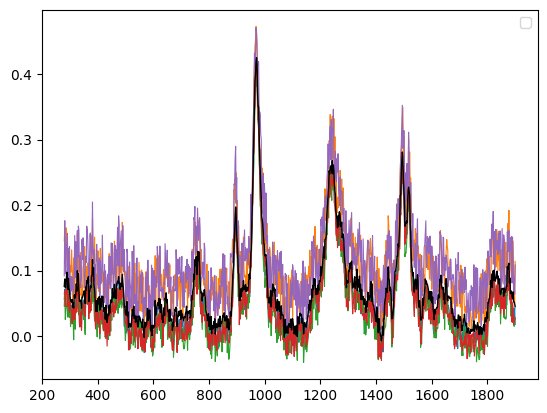

In [ ]:
import random

# 定義顏色列表，排除紅色
colors = ['blue', 'green', 'yellow', 'purple', 'orange', 'cyan']

num = 0
x_axis = np.linspace(280, 1900, 864)
print(final_result_3[2000:2100, :].shape)
for argument_data in final_result_3[2000:2100, :]:
    plt.plot(x_axis, argument_data, linewidth=0.8)
    num += 1
    if num == 5:
        break

result_data = result_matrix[2, :]
plt.plot(x_axis, result_data, linewidth=1, color='black')

# plt.title("Raman Spectrum_after_augmentation", fontsize=15)
# plt.xlabel("Raman Shift (cm$^{-1}$)", fontsize=10)
# plt.ylabel("Intensity (a.u.)", fontsize=10)
plt.legend()
plt.show()

## **4.Training.py**

In [ ]:
!cd /content/drive/MyDrive/Lab/DeepRaman/DeepRaman && python training.py

2023-09-16 08:19:43.749948: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-16 08:19:45.785960: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/content/drive/MyDrive/Lab/DeepRaman/DeepRaman/training.py:192: RuntimeWarning: invalid value encountered in divide
  Xtrain[i,j,k,:]=Xtrain[i,j,k,:]/np.max(Xtrain[i,j,k,:])
(8000, 2, 864, 1) (8000, 2)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 2, None, 1)]         0         []                            
                                                  

In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab_Notebooks/senior_project')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


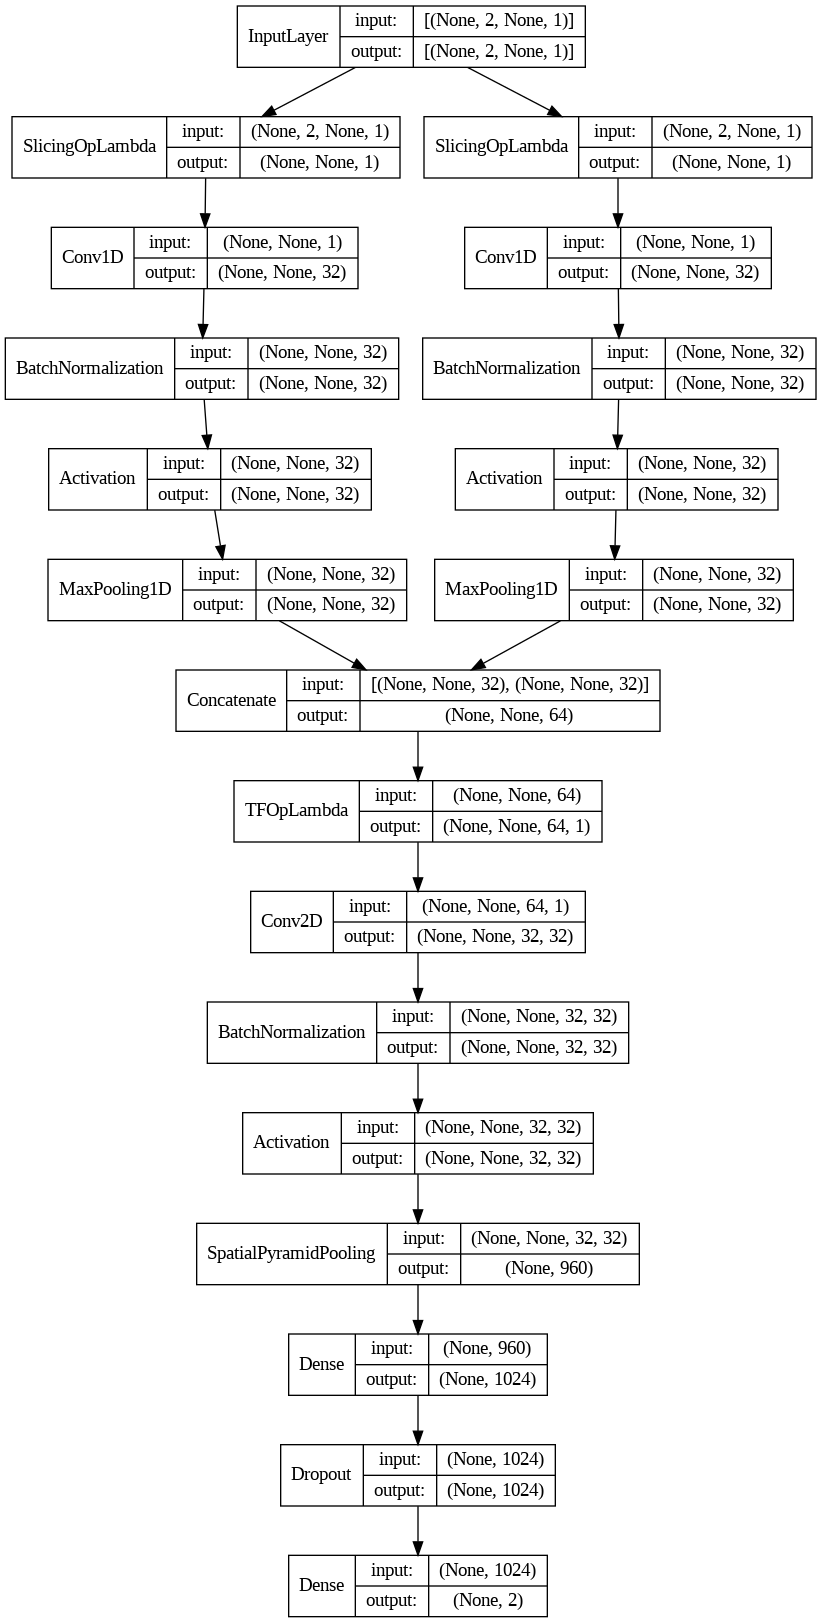

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from SNN_SPP import SpatialPyramidPooling

def SSPmodel():
    # X：processed training data [:,2,N,1],N represents the length of spectra
    # inputA: spectra from database
    # inputB：spectra of unknown


    inputs = tf.keras.layers.Input((2,None,1))

    inputA = inputs[:,0,:]
    inputB = inputs[:,1,:]


    convA1 = tf.keras.layers.Conv1D(32, kernel_size=(7), strides=(1),padding = 'same', kernel_initializer = 'he_normal')(inputA)
    convA1 = tf.keras.layers.BatchNormalization()(convA1)
    convA1 = tf.keras.layers.Activation('relu')(convA1)
    poolA1 = tf.keras.layers.MaxPooling1D(3)(convA1)


    convB1 = tf.keras.layers.Conv1D(32, kernel_size=(7), strides=(1),padding = 'same', kernel_initializer = 'he_normal')(inputB)
    convB1 = tf.keras.layers.BatchNormalization()(convB1)
    convB1 = tf.keras.layers.Activation('relu')(convB1)
    poolB1 = tf.keras.layers.MaxPooling1D(3)(convB1)

    con = tf.keras.layers.concatenate([poolA1,poolB1],2)
    con = tf.expand_dims(con, -1)

    conv1 = tf.keras.layers.Conv2D(32, kernel_size=(7,7), strides=(2,2),padding = 'same', kernel_initializer = 'he_normal')(con)
    conv1 = tf.keras.layers.BatchNormalization()(conv1)
    conv1 = tf.keras.layers.Activation('relu')(conv1)

    spp = SpatialPyramidPooling([1, 2, 3, 4])(conv1)

    full1 = tf.keras.layers.Dense(1024, activation='relu')(spp)
    drop1 = tf.keras.layers.Dropout(0.5)(full1)


    outputs = tf.keras.layers.Dense(2, activation='sigmoid')(drop1)#sigmoid
    model = tf.keras.models.Model(inputs,outputs)
    return model


# 创建模型
model = SSPmodel()  # 使用您定义的SSPmodel函数创建模型

# 绘制模型结构图
plot_model(model, to_file='/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/spp_model.png', show_shapes=True, show_layer_names=False)

## **5.Testing.ipynb(因為要進行程式追蹤，故使用分段run code)**

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.python.framework import ops
from sklearn import preprocessing
from sklearn.linear_model import enet_path
from scipy.sparse import spdiags,eye,csc_matrix, diags
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Layer
import copy
import csv

In [ ]:
# Database
datafile0 = u'/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/self_corrected_puredata_baseline_ver.npy'
spectrum_pure = np.load(datafile0, allow_pickle=True)
print(spectrum_pure)

# Unknow
datafile1 =u'/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/testing_unknown_data.npy'
spectrum_mix = np.load(datafile1, allow_pickle=True)
print(spectrum_mix.shape)

# Component information of Unknow

datafile2 = '/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/testing_unknown_data.csv'
with open(datafile2, 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.reader(csvfile)

data_0 = pd.read_csv(datafile2, encoding='utf-8')
DBcoms_0 = list(data_0['id'])
DBcoms_00 = [item for item in DBcoms_0]
print(DBcoms_0)


# Component information of database

datafile3 = '/content/drive/MyDrive/Lab/Senior_project/SERS bead data/All Baseline corrected/corrected_pure.csv'
with open(datafile3, 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.reader(csvfile)

data_1 = pd.read_csv(datafile3, encoding='utf-8')
# DBcoms_1 = list(data_1['id'])
# DBcoms_11 = [item for item in DBcoms_1]
DBcoms_1 = list(data_1['label'])
DBcoms_11 = [item for item in DBcoms_1]
DBcoms_11 = DBcoms_11[:5]

print('Pure：',spectrum_pure.shape)
print('Unknow：',spectrum_mix.shape)
print('Database：',DBcoms_11)
print('Unknow：',len(DBcoms_0))

[[ 0.01240743  0.01294971  0.01040782 ...  0.05118127  0.0549845
   0.05262046]
 [ 0.07433873  0.09107386  0.05438438 ...  0.07426644  0.07300358
   0.06317784]
 [ 0.02765821  0.03102811  0.02606421 ...  0.07248972  0.08206844
   0.05802313]
 [ 0.08501295  0.10473628  0.09980068 ...  0.0709928   0.04928342
   0.05979366]
 [ 0.1157011   0.11973893  0.12584968 ... -0.00071005  0.00372869
  -0.00086367]]
(10000, 864)
['mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 

In [ ]:
# spectrum_pure_s = np.array([sublist[1:] for sublist in spectrum_pure])
spectrum_pure_s = np.array([sublist for sublist in spectrum_pure])
spectrum_mix_s = np.array([sublist for sublist in spectrum_mix])
spectrum_pure_sc =  copy.deepcopy(spectrum_pure_s)
spectrum_mix_sc = copy.deepcopy(spectrum_mix_s)
print(spectrum_mix_sc[:10,:10])
"""
for i in range(spectrum_mix.shape[0]):
    spectrum_mix_sc[i,:] = spectrum_mix_s[i,:]/np.max(spectrum_mix_s[i,:])
for i in range(spectrum_pure.shape[0]):
    spectrum_pure_sc[i,:] = spectrum_pure_s[i,:]/np.max(spectrum_pure_s[i,:])
"""

print(spectrum_mix_sc.shape)

X = np.zeros((spectrum_mix_sc.shape[0]*spectrum_pure_sc.shape[0],2,864,1))
print(X.shape)

for p in range(spectrum_mix_sc.shape[0]):
    for q in range(spectrum_pure_sc.shape[0]):
        X[int(p*spectrum_pure_sc.shape[0]+q),0,:,0] = spectrum_mix_sc[p,:]
        X[int(p*spectrum_pure_sc.shape[0]+q),1,:,0] = spectrum_pure_sc[q,:]
print(X.shape)

[[0.03999319 0.05926369 0.05344842 0.05316126 0.04862821 0.06222069
  0.06675809 0.04061007 0.05595897 0.04951437]
 [0.0475812  0.05228689 0.05092882 0.03573936 0.05537496 0.06159419
  0.05558084 0.03608124 0.04753089 0.05783597]
 [0.05559251 0.05406852 0.05390818 0.05746184 0.05916205 0.0594553
  0.06105781 0.04603212 0.06844397 0.05781668]
 [0.04560007 0.05140083 0.04288354 0.05801509 0.05137164 0.0454825
  0.05963836 0.05395768 0.05647159 0.04245333]
 [0.08384948 0.10408121 0.10562625 0.06654949 0.06991092 0.10012564
  0.10065686 0.1316437  0.1462354  0.11883484]
 [0.10155527 0.08553724 0.09243021 0.09706127 0.08303586 0.11646897
  0.0925792  0.07966894 0.11224199 0.08795603]
 [0.07771118 0.09746882 0.08901688 0.09991237 0.12078534 0.09617708
  0.10314298 0.0769408  0.09104864 0.12275208]
 [0.05610973 0.06528903 0.06023474 0.05444831 0.06227844 0.06498119
  0.07048634 0.05575258 0.06991883 0.06011714]
 [0.07806339 0.07763277 0.09074785 0.06674962 0.09074167 0.10713158
  0.07882018 0

In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab_Notebooks/senior_project')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from SNN_SPP import SpatialPyramidPooling

custom_objects = {'SpatialPyramidPooling': SpatialPyramidPooling}
re_model = tf.keras.models.load_model('/content/drive/MyDrive/Lab/DeepRaman/model/230913_model_ver1.h5', custom_objects=custom_objects)
y = re_model.predict(X)
print(y)

1563/1563 [==============================] - 142s 90ms/step
[[0.93388283 0.06446619]
 [0.93755853 0.06764723]
 [0.9414665  0.06348082]
 ...
 [0.93659997 0.07093044]
 [0.9293118  0.08360994]
 [0.94336665 0.06010621]]


In [ ]:
result_list = []

ratio_sc_nparray = []

# cc:對應比例
for cc in range(spectrum_mix.shape[0]):
    print(cc)
    com=[]
    coms = []
    ra2 = []
    for ss in range(cc * spectrum_pure_s.shape[0], (cc + 1) * spectrum_pure_s.shape[0]):
        if y[ss, 0] >= 0.5:
            com.append(ss % spectrum_pure_s.shape[0])

    X = spectrum_pure_s[com]
    # print(X.shape)
    coms = [DBcoms_11[com[h]] for h in range(len(com))]

    _, coefs_lasso, _ = enet_path(X.T, spectrum_mix_s[cc, :], l1_ratio=0.96, positive=True)  # fit_intercept=False)
    ratio = coefs_lasso[:, -1]
    ratio_sc = copy.deepcopy(ratio)
    ratio_sc_nparray.append(ratio_sc)

    for ss2 in range(ratio.shape[0]):
        ratio_sc[ss2] = ratio[ss2] / np.sum(ratio)

    print('The', DBcoms_0[cc], 'spectra may contain:', coms)
    print('The corresponding ratio is:', ratio_sc)

    # 創建一個字典來存儲結果
    result = {
        'id': DBcoms_0[cc],
    }

    # 將每個成分的比例添加到字典中
    for i, com_value in enumerate(coms):
        result[com_value] = ratio_sc[i]

    # 將結果字典添加到結果列表中
    result_list.append(result)

# 指定CSV文件的路徑
csv_filename = '/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_new/testing_ratio_predict_0915.csv'

# 將字典列表寫入CSV文件
with open(csv_filename, 'w', newline='') as csvfile:
    fieldnames = ['id'] + coms  # 定義CSV文件的列名
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # 寫入列名
    writer.writeheader()

    # 寫入字典數據
    for result in result_list:
        writer.writerow(result)

print(f'Data saved as {csv_filename}')

串流輸出內容已截斷至最後 5000 行。
8334
The mix 9 spectra may contain: [' 4ATP', ' 4NTP', ' 4MBA', ' 3MBA', ' ClTP']
The corresponding ratio is: [0.         0.16173282 0.23214307 0.3011231  0.30500101]
8335
The mix 9 spectra may contain: [' 4ATP', ' 4NTP', ' 4MBA', ' 3MBA', ' ClTP']
The corresponding ratio is: [0.         0.14882248 0.24324422 0.30984389 0.29808941]
8336
The mix 9 spectra may contain: [' 4ATP', ' 4NTP', ' 4MBA', ' 3MBA', ' ClTP']
The corresponding ratio is: [0.01141947 0.03229672 0.23577812 0.37126061 0.34924508]
8337
The mix 9 spectra may contain: [' 4ATP', ' 4NTP', ' 4MBA', ' 3MBA', ' ClTP']
The corresponding ratio is: [0.         0.18080096 0.25035144 0.27272403 0.29612357]
8338
The mix 9 spectra may contain: [' 4ATP', ' 4NTP', ' 4MBA', ' 3MBA', ' ClTP']
The corresponding ratio is: [0.01325957 0.01084657 0.23813638 0.37967991 0.35807757]
8339
The mix 9 spectra may contain: [' 4ATP', ' 4NTP', ' 4MBA', ' 3MBA', ' ClTP']
The corresponding ratio is: [0.02012904 0.         0.19663156 

[[0.41414141 0.08080808 0.03030303 0.26262626 0.21212121]
 [0.11881188 0.14851485 0.5049505  0.16831683 0.05940594]
 [0.12       0.37       0.07       0.19       0.25      ]
 [0.22       0.13       0.31       0.23       0.11      ]
 [0.33       0.12       0.12       0.06       0.37      ]
 [0.11       0.11       0.71       0.04       0.03      ]
 [0.1        0.29       0.41       0.16       0.04      ]
 [0.05050505 0.26262626 0.11111111 0.35353535 0.22222222]
 [0.00990099 0.03960396 0.23762376 0.36633663 0.34653465]
 [0.24       0.13       0.33       0.05       0.25      ]]
0 0
         4ATP      4NTP      4MBA      3MBA      ClTP
0    0.465418  0.035275  0.002495  0.277997  0.218815
1    0.487207  0.005654  0.000000  0.285504  0.221636
2    0.441849  0.045164  0.021912  0.273905  0.217171
3    0.489786  0.005696  0.000000  0.280480  0.224038
4    0.279868  0.225126  0.101034  0.213740  0.180232
..        ...       ...       ...       ...       ...
995  0.282796  0.246091  0.089926  0.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


1 0
         4ATP      4NTP      4MBA      3MBA      ClTP
0    0.052283  0.287975  0.443284  0.154945  0.061513
1    0.140618  0.093472  0.525409  0.187095  0.053405
2    0.046754  0.282798  0.447925  0.158018  0.064505
3    0.118891  0.148910  0.504681  0.168465  0.059054
4    0.164198  0.049474  0.556296  0.176361  0.053671
..        ...       ...       ...       ...       ...
995  0.159308  0.060480  0.543375  0.185283  0.051554
996  0.154511  0.064730  0.536496  0.186734  0.057529
997  0.142569  0.105786  0.522273  0.177104  0.052268
998  0.078001  0.256201  0.448373  0.150069  0.067356
999  0.135798  0.107628  0.519422  0.180542  0.056611

[1000 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


2 0
         4ATP      4NTP      4MBA      3MBA      ClTP
0    0.053417  0.453142  0.116844  0.168385  0.208212
1    0.085450  0.440137  0.096929  0.154967  0.222517
2    0.132586  0.355072  0.059749  0.195725  0.256868
3    0.078773  0.414489  0.108179  0.168870  0.229688
4    0.122171  0.367970  0.067938  0.190705  0.251216
..        ...       ...       ...       ...       ...
995  0.057710  0.422228  0.144025  0.150180  0.225857
996  0.135489  0.349370  0.054602  0.202496  0.258043
997  0.053911  0.446244  0.136326  0.150350  0.213168
998  0.127271  0.362498  0.061739  0.193847  0.254645
999  0.170687  0.314668  0.032803  0.209495  0.272348

[1000 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 46.

3 0
         4ATP      4NTP      4MBA      3MBA      ClTP
0    0.230517  0.109858  0.314317  0.236392  0.108915
1    0.144985  0.250934  0.298286  0.203406  0.102389
2    0.152668  0.241884  0.309555  0.189084  0.106809
3    0.162818  0.215397  0.313573  0.196410  0.111803
4    0.248152  0.082194  0.317207  0.240347  0.112100
..        ...       ...       ...       ...       ...
995  0.292036  0.012976  0.319909  0.277823  0.097256
996  0.274460  0.043961  0.323150  0.249919  0.108511
997  0.165453  0.223877  0.297343  0.197514  0.115812
998  0.224296  0.122766  0.309871  0.233357  0.109710
999  0.229165  0.115757  0.309590  0.235258  0.110230

[1000 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 46.

4 0
         4ATP      4NTP      4MBA      3MBA      ClTP
0    0.207290  0.270855  0.161282  0.055768  0.304806
1    0.373816  0.065522  0.110517  0.058313  0.391831
2    0.210850  0.249650  0.181288  0.049488  0.308723
3    0.382016  0.045547  0.096533  0.073120  0.402784
4    0.363676  0.078089  0.105858  0.063134  0.389243
..        ...       ...       ...       ...       ...
995  0.243192  0.215267  0.141572  0.072811  0.327158
996  0.352028  0.097887  0.109013  0.060528  0.380544
997  0.203008  0.259200  0.189326  0.046899  0.301567
998  0.417523  0.002424  0.102049  0.052967  0.425037
999  0.421505  0.017619  0.083260  0.059023  0.418593

[1000 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 46.

0 1
         4ATP      4NTP      4MBA      3MBA      ClTP
0    0.157389  0.014322  0.776745  0.033561  0.017984
1    0.078916  0.212848  0.626598  0.044847  0.036791
2    0.067375  0.236333  0.606629  0.034634  0.055030
3    0.071473  0.205086  0.630914  0.044310  0.048216
4    0.065031  0.211097  0.640655  0.046183  0.037034
..        ...       ...       ...       ...       ...
995  0.148171  0.008447  0.793355  0.032582  0.017445
996  0.147512  0.031510  0.765413  0.040969  0.014596
997  0.151989  0.000000  0.808800  0.025899  0.013313
998  0.133243  0.059908  0.741445  0.045749  0.019655
999  0.122712  0.081585  0.733590  0.035707  0.026406

[1000 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 40.0

1 1
         4ATP      4NTP      4MBA      3MBA      ClTP
0    0.042117  0.378094  0.396655  0.132701  0.050434
1    0.061602  0.367501  0.392584  0.125679  0.052634
2    0.125213  0.246014  0.431621  0.162961  0.034190
3    0.049937  0.376696  0.385002  0.134919  0.053445
4    0.126543  0.259138  0.418226  0.167824  0.028269
..        ...       ...       ...       ...       ...
995  0.120447  0.258927  0.419390  0.167469  0.033767
996  0.138367  0.223882  0.425477  0.186081  0.026192
997  0.046359  0.381175  0.394239  0.124989  0.053238
998  0.130233  0.231068  0.422003  0.188991  0.027705
999  0.123774  0.253630  0.421248  0.167026  0.034323

[1000 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 53.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.

2 1
         4ATP      4NTP      4MBA      3MBA      ClTP
0    0.000000  0.377453  0.165380  0.265820  0.191346
1    0.054896  0.255054  0.104803  0.361244  0.224002
2    0.030932  0.319456  0.142015  0.301184  0.206412
3    0.063055  0.229954  0.100231  0.377418  0.229341
4    0.016684  0.353227  0.143618  0.288157  0.198314
..        ...       ...       ...       ...       ...
995  0.009988  0.357728  0.152236  0.282683  0.197364
996  0.052897  0.256234  0.106257  0.359556  0.225056
997  0.053993  0.256440  0.105796  0.359543  0.224228
998  0.010220  0.338758  0.152932  0.300173  0.197918
999  0.080841  0.184214  0.077679  0.418605  0.238661

[1000 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 53.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.

3 1
         4ATP      4NTP      4MBA      3MBA      ClTP
0    0.043457  0.000000  0.139909  0.442349  0.374284
1    0.000000  0.162007  0.246954  0.293532  0.297507
2    0.000000  0.213619  0.232747  0.277302  0.276333
3    0.023839  0.000000  0.208657  0.403012  0.364492
4    0.030163  0.000000  0.157249  0.436751  0.375837
..        ...       ...       ...       ...       ...
995  0.014506  0.021265  0.231472  0.378520  0.354238
996  0.015248  0.006886  0.236864  0.382831  0.358170
997  0.000000  0.198129  0.227782  0.282199  0.291890
998  0.012789  0.025449  0.236778  0.374307  0.350677
999  0.000000  0.173637  0.238876  0.292118  0.295370

[1000 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 53.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.

4 1
         4ATP      4NTP      4MBA      3MBA      ClTP
0    0.279046  0.075179  0.334203  0.045955  0.265617
1    0.277598  0.074838  0.331741  0.053778  0.262046
2    0.242155  0.127583  0.329853  0.049857  0.250553
3    0.281401  0.064274  0.330368  0.051317  0.272640
4    0.142609  0.266805  0.302474  0.074316  0.213796
..        ...       ...       ...       ...       ...
995  0.243520  0.125418  0.330255  0.049656  0.251150
996  0.165608  0.228464  0.337495  0.041886  0.226548
997  0.313494  0.004029  0.343560  0.060515  0.278402
998  0.170547  0.228900  0.330978  0.044889  0.224687
999  0.175361  0.222766  0.329858  0.048246  0.223768

[1000 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 53.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.

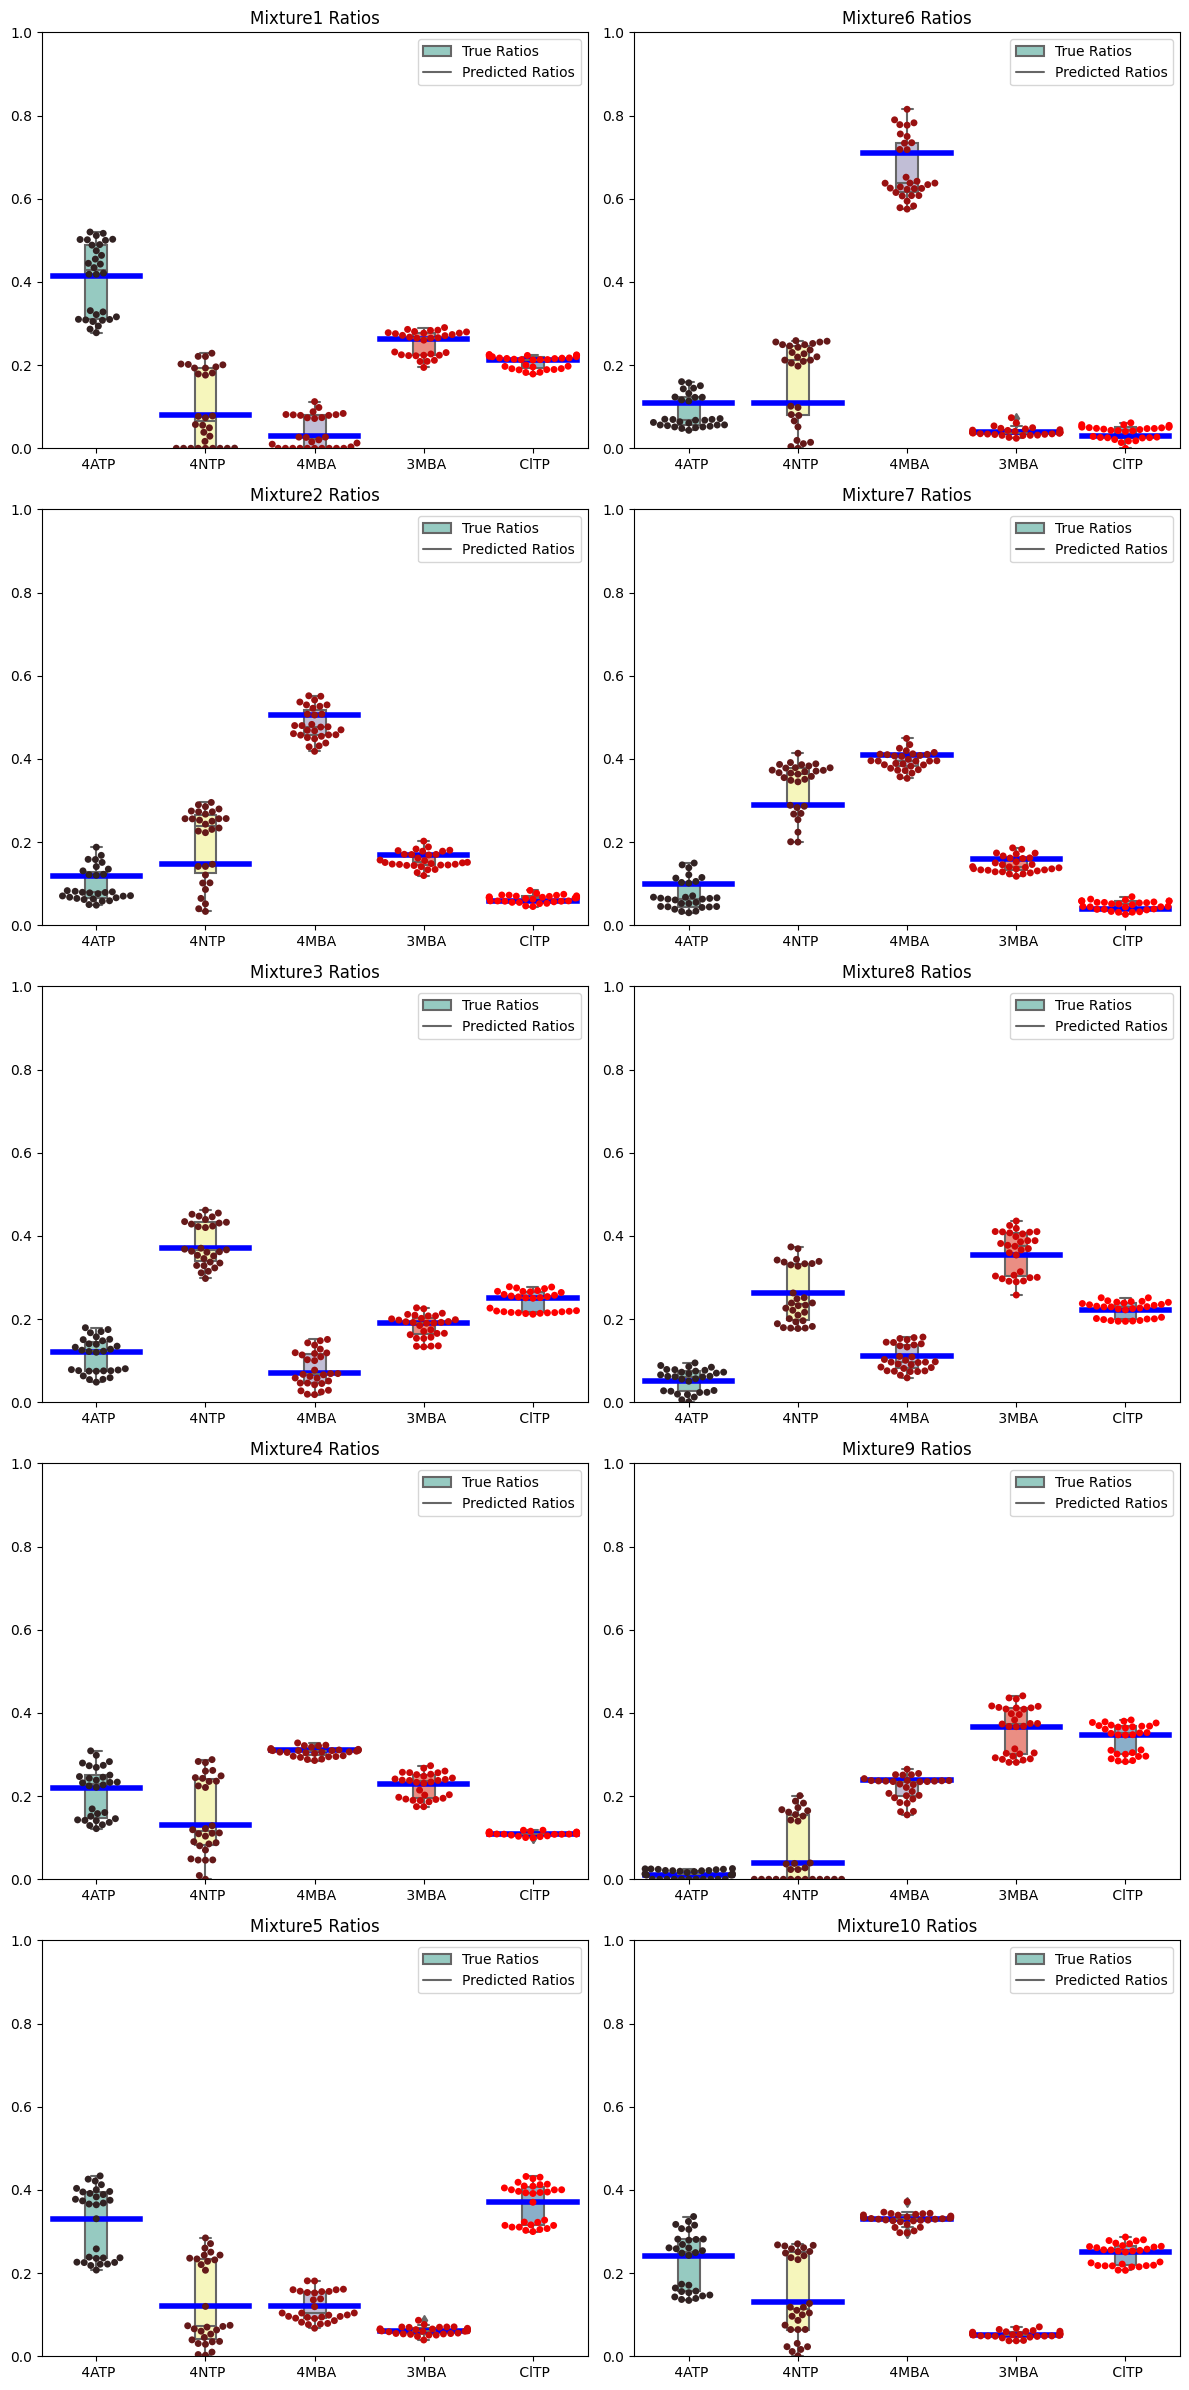

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

true_ratios = np.load("/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/testing_unknown_ratio.npy")
print(true_ratios)

# 模擬混合比例數據
components = coms
predicted_ratios = np.array(ratio_sc_nparray)

# 設置生成多個圖的數量
num_plots = true_ratios.shape[0]

x = components
y = dict()

# 計算子圖的行數和列數
num_rows = 5
num_cols = 2

# 創建大圖表
fig, axes = plt.subplots(5, 2, figsize=(12, 24))

# 將子圖按照兩行五列的布局放置
for i in range(num_plots):
    row = i % num_rows
    if i < 5:
        col = 0
    else:
        col = 1
    print(row, col)

    # 從預測數據中提取子數據
    data = predicted_ratios[1000 * i:1000 * (i + 1)].T

    # print(data.shape)
    for j in range(len(components)):
        y.update({components[j]: list(data[j])})
        # print(y)
    df = pd.DataFrame(y)
    print(df)

    # 隨機選擇100行數據
    random_rows = df.sample(n=30)  # 從數據框中隨機選擇100行

    # 在創建子圖時設置Seaborn主題樣式
    with sns.axes_style("whitegrid"):
        sns.boxplot(data=random_rows, width=0.2, palette="Set3", ax=axes[row, col])
        sns.swarmplot(data=random_rows, color="red", ax=axes[row, col])

    # 繪製 bar plot
    bars = axes[row, col].bar(x, true_ratios[i, :], color='blue', alpha=0)

    # 添加頂部橫線
    for bar in bars:
        axes[row, col].plot([bar.get_x(), bar.get_x() + bar.get_width()], [bar.get_height(), bar.get_height()], color='blue', linewidth=4)

    # 設置圖表標題
    axes[row, col].set_title(f'Mixture{i+1} Ratios')
    axes[row, col].set_ylim(0, 1)

    # 添加圖例
    axes[row, col].legend(['True Ratios', 'Predicted Ratios'], loc='upper right')

# 調整子圖表之間的間距
plt.tight_layout()

# 顯示大圖表
plt.show()


In [ ]:
# 從CSV文件加載數據
csv_filename_1 = '/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_new/testing_ratio_predict_0915.csv'
data_predict = pd.read_csv(csv_filename_1)

# 將數據轉換為NumPy array
data_predict = data_predict.to_numpy()

#######################

# 從CSV文件加載數據
csv_filename_2 = '/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/unknown_ratio_data.csv'
data_real = pd.read_csv(csv_filename_2)

# 將數據轉換為NumPy array
data_real = data_real.to_numpy()

print(data_predict.shape, data_real.shape)

print(data_predict[:,0])
print(data_real[:,0])
print(data_predict[:,1:])
print(data_real[:,1:])

print(data_predict)
print(data_real)

(10000, 6) (10, 6)
['mix 1' 'mix 1' 'mix 1' ... 'mix 10' 'mix 10' 'mix 10']
['mix 1' 'mix 2' 'mix 3' 'mix 4' 'mix 5' 'mix 6' 'mix 7' 'mix 8' 'mix 9'
 'mix 10']
[[0.4654176817239316 0.0352745650787118 0.0024954034227604
  0.2779970472768589 0.2188153024977371]
 [0.4872068809382538 0.0056537343649321 0.0 0.285503671335223
  0.2216357133615908]
 [0.4418488499977943 0.0451637101927699 0.0219116750882369
  0.2739050160901233 0.2171707486310755]
 ...
 [0.3134940046640158 0.0040285686100655 0.3435604292889413
  0.0605151126959335 0.2784018847410439]
 [0.170546815783144 0.2288995418880985 0.3309779782093915
  0.0448888062455481 0.2246868578738177]
 [0.1753609917040462 0.2227661090102801 0.3298582826890085
  0.0482461770599211 0.2237684395367439]]
[[0.4141414141414141 0.0808080808080808 0.0303030303030303
  0.2626262626262626 0.2121212121212121]
 [0.1188118811881188 0.1485148514851485 0.504950495049505
  0.1683168316831683 0.0594059405940594]
 [0.12 0.37 0.07 0.19 0.25]
 [0.22 0.13 0.31 0.23 0.

In [ ]:
from sklearn.metrics import confusion_matrix

# 假設真實比例和預測比例存儲在這兩個Python列表中
true_ratios = data_real[:, 1:]
predicted_ratios = data_predict[:, 1:]

rl_labels = data_real[:, 0]  # real有幾個標籤
predict_labels = data_predict[:, 0]  # 總共數量

print(rl_labels, predict_labels)

predict_labels = [item.split() for item in predict_labels]
predict_labels = [' '.join(sublist) for sublist in predict_labels]

# 初始化用於存儲最小方均差和標籤的列表
selected_predictions = []

# 外部迭代預測比例
for predicted_ratio in predicted_ratios:
    # print(predicted_ratio)
    min_diff = float('inf')  # 初始化最小方均差
    selected_label = None

    # 內部迭代真實比例
    for idx, true_ratio in enumerate(true_ratios):
        # print(true_ratios)
        diff = 0
        for i in range(len(predicted_ratio)):
            # print(predicted_ratio[i])
            # print(true_ratio[i])
            diff = diff + (predicted_ratio[i] - true_ratio[i]) ** 2

        if diff < min_diff:
            min_diff = diff
            selected_label = rl_labels[idx]

    selected_predictions.append(selected_label)
# print(selected_predictions)

selected_predictions_new = []
for selected_prediction in selected_predictions:
    selected_data = selected_prediction.replace(' ', ' ')
    selected_predictions_new.append(selected_data)

new_labels = []
for label in rl_labels:
    label_data = label.replace(' ', ' ')
    new_labels.append(label_data)

print(len(predict_labels))
print(len(selected_predictions_new))
print(predict_labels)
print(selected_predictions_new)

# 構建多標籤混淆矩陣
confusion_matrix = confusion_matrix(predict_labels, selected_predictions_new, labels=new_labels)

# 打印多標籤混淆矩陣
print("Multiclassfication Confusion Matrix:")
print(confusion_matrix)

['mix 1' 'mix 2' 'mix 3' 'mix 4' 'mix 5' 'mix 6' 'mix 7' 'mix 8' 'mix 9'
 'mix 10'] ['mix 1' 'mix 1' 'mix 1' ... 'mix 10' 'mix 10' 'mix 10']
10000
10000
['mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 'mix 1', 

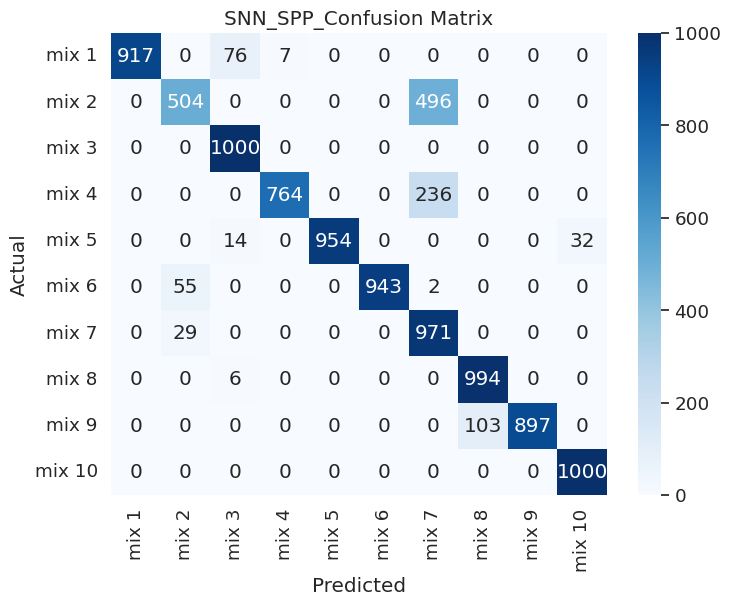

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 定義類別標籤
class_labels = new_labels

# 使用Seaborn熱圖（heatmap）繪製混淆矩陣
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # 設定字體大小

# 繪製混淆矩陣熱圖
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# 設定圖形標題和軸標籤
plt.title('SNN_SPP_Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 保存成PNG檔案
plt.savefig('/content/drive/MyDrive/Lab/DeepRaman/data/confusion_matrix_0911_ver2.png', format='png', dpi=300)

# 顯示圖形
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 假設模型的預測值和真實數據如下
y_test = predict_labels
y_pred = selected_predictions_new

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy：{accuracy:.4f}")
print(f"Precision：{precision:.4f}")
print(f"Recall：{recall:.4f}")
print(f"F1 score：{f1:.4f}")
print(f"Confusion matrix：\n{confusion}")


Accuracy：0.8944
Precision：0.9205
Recall：0.8944
F1 score：0.8951
Confusion matrix：
[[ 917    0    0   76    7    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0    0  504    0    0    0    0  496    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0    0  764    0    0  236    0    0]
 [   0   32    0   14    0  954    0    0    0    0]
 [   0    0   55    0    0    0  943    2    0    0]
 [   0    0   29    0    0    0    0  971    0    0]
 [   0    0    0    6    0    0    0    0  994    0]
 [   0    0    0    0    0    0    0    0  103  897]]


In [ ]:
# 初始化一個(10, 2)的數組來存儲每行的TPR和FNR
tpr_fnr_array = np.zeros((10, 2))

# 計算每行的TPR和FNR
for i in range(10):
    tp = confusion[i, i]
    fn = np.sum(confusion[i, :]) - tp
    tpr = tp / (tp + fn)  # 計算TPR
    fnr = fn / (tp + fn)  # 計算FNR
    tpr_fnr_array[i, 0] = tpr
    tpr_fnr_array[i, 1] = fnr

# 輸出每行的TPR和FNR
print("每行的TPR和FNR：")
print(tpr_fnr_array)

每行的TPR和FNR：
[[0.917 0.083]
 [1.    0.   ]
 [0.504 0.496]
 [1.    0.   ]
 [0.764 0.236]
 [0.954 0.046]
 [0.943 0.057]
 [0.971 0.029]
 [0.994 0.006]
 [0.897 0.103]]


## **6. 其他分類方法**

**2. SVM**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import csv
import copy

# 如果是混合數據進行訓練
# 訓練
datafile0 = '/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/unknown_ratio_data.csv'

datafile1 = u'/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/testing_unknown_data_before.npy'
# datafile1 = u'/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_new/testing_unknown_corr.npy'
# 測試
datafile2 = '/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/testing_unknown_data.csv'
# datafile2 = '/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_new/testing_unknown_data_corr.csv'

# datafile0 = '/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/unknown_ratio_data.csv'
with open(datafile0, 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.reader(csvfile)
data_1 = pd.read_csv(datafile0, encoding='utf-8')
data_1 = np.array(data_1)
y_train = data_1[:, 0]
print(y_train)

X_train_ini = np.load(datafile1, allow_pickle=True)
X_train_ini = np.array([sublist[:] for sublist in X_train_ini])  # 使用列表切片去掉每個子列表的第一個元素

X_train = copy.deepcopy(X_train_ini)

"""
for i in range(X_train.shape[0]):
    X_train[i, :] = X_train_ini[i, :] / np.max(X_train_ini[i, :])
for i in range(X_train.shape[0]):
    X_train[i, :] = X_train_ini[i, :] / np.max(X_train_ini[i, :])
"""
print(X_train)

with open(datafile2, 'r', encoding='utf-8') as csvfile:
    csv_reader


['mix 1' 'mix 2' 'mix 3' 'mix 4' 'mix 5' 'mix 6' 'mix 7' 'mix 8' 'mix 9'
 'mix 10']
[[0.05885302 0.06656843 0.0624005  ... 0.04788823 0.04489162 0.04417605]
 [0.04766303 0.05547414 0.04674895 ... 0.06562144 0.06733216 0.05494657]
 [0.07600803 0.08725789 0.0736202  ... 0.05200574 0.04965028 0.04489675]
 ...
 [0.07898951 0.09165661 0.0809541  ... 0.05508432 0.0493204  0.04664402]
 [0.080877   0.09097054 0.08862228 ... 0.04643448 0.04228349 0.03841608]
 [0.05494495 0.06035836 0.05462149 ... 0.04923188 0.05316568 0.04276343]]
[[0.0914895786359689 0.1156792810667917 0.0675728099891438 ...
  0.1133361314263752 0.0743451689639328 0.0463382808646437]
 [0.0504760281019846 0.0597540305161297 0.0582015815760651 ...
  0.0461912723416954 0.0325108737381451 0.0323886467094079]
 [0.0988370560359892 0.144131825888145 0.104254231977295 ...
  0.0514559672975018 0.1054138646988694 0.1189714037104595]
 ...
 [0.1102143157107908 0.1204125028951638 0.0854154643866738 ...
  0.0637688924741209 0.10238251673378

In [ ]:
print(y_pred)
print(y_train)
print(y_test)

# 可以獲得每個混合光譜屬於每個類別的機率
# probabilities = clf.predict_proba(X_test, probability=True)
# print(probabilities)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion = confusion_matrix(y_test, y_pred, labels=y_train)

print(f"Accuracy：{accuracy:.4f}")
print(f"Precision：{precision:.4f}")
print(f"Recall：{recall:.4f}")
print(f"F1 score：{f1:.4f}")
print(f"Confusion matrix：\n{confusion}")

['mix 1' 'mix 1' 'mix 1' ... 'mix 3' 'mix 3' 'mix 10']
['mix 1' 'mix 2' 'mix 3' 'mix 4' 'mix 5' 'mix 6' 'mix 7' 'mix 8' 'mix 9'
 'mix 10']
['mix 1' 'mix 1' 'mix 1' ... 'mix 10' 'mix 10' 'mix 10']
Accuracy：0.7216
Precision：0.8289
Recall：0.7216
F1 score：0.7342
Confusion matrix：
[[1000    0    0    0    0    0    0    0    0    0]
 [   0  518    0    0    0    0  482    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0    0  516    0    0  484    0    0    0]
 [   0    0  265    0  735    0    0    0    0    0]
 [   0    0    0    0    0  584  416    0    0    0]
 [   0  245    0    0    0    0  755    0    0    0]
 [   0    0   89    0    0    0    0  911    0    0]
 [   0    0    0    0    0    0    0  440  560    0]
 [   0    0  363    0    0    0    0    0    0  637]]


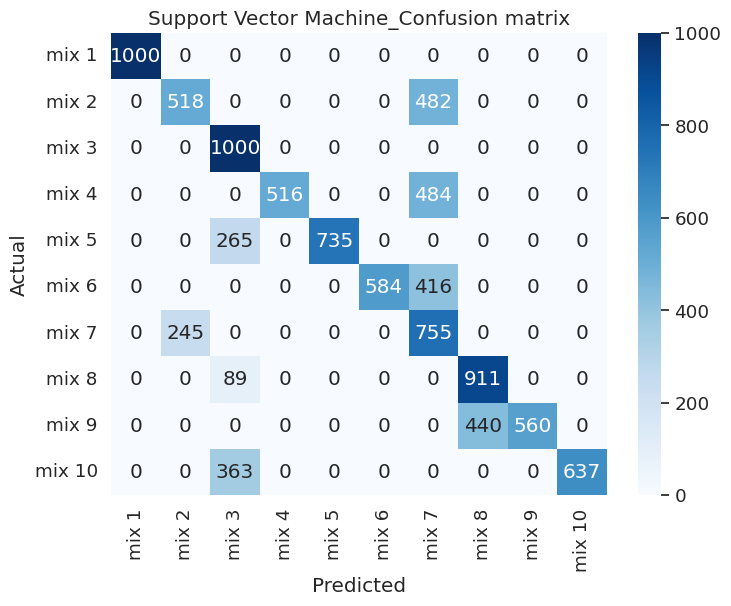

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 定義類別標籤
class_labels = y_train

# 使用Seaborn熱圖（heatmap）繪製混淆矩陣
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # 設定字體大小

# 繪製混淆矩陣熱圖
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# 設定圖形標題和軸標籤
plt.title('Support Vector Machine_Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 保存成PNG檔案
plt.savefig('/content/drive/MyDrive/Lab/DeepRaman/data/static_confusion_matrix_svm.png', format='png', dpi=300)

# 顯示圖形
plt.show()

**3. 邏輯回歸模型**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import csv
import pandas as pd
import copy

# 如果是混合數據進行訓練
# 訓練
datafile0 = '/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/unknown_ratio_data.csv'

datafile1 = u'/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/testing_unknown_data_before.npy'
# datafile1 = u'/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_new/testing_unknown_corr.npy'
# 測試
datafile2 = '/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/testing_unknown_data.csv'
# datafile2 = '/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_new/testing_unknown_data_corr.csv'

with open(datafile0, 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.reader(csvfile)
data_1 = pd.read_csv(datafile0, encoding='utf-8')
data_1 = np.array(data_1)
y_train = data_1[:, 0]
print(y_train)

X_train_ini = np.load(datafile1, allow_pickle=True)
X_train_ini = np.array([sublist[:] for sublist in X_train_ini])  # 使用列表切片去掉每個子列表的第一個元素

X_train = copy.deepcopy(X_train_ini)

"""
for i in range(X_train.shape[0]):
    X_train[i,:] = X_train_ini[i,:]/np.max(X_train_ini[i,:])
for i in range(X_train.shape[0]):
    X_train[i,:] = X_train_ini[i,:]/np.max(X_train_ini[i,:])
"""
print(X_train)

with open(datafile2, 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.reader(csvfile)
data_2 = pd.read_csv(datafile2, encoding='utf-8')
data_2 = np.array(data_2)
# np.random.shuffle(data_2)
y_test = data_2[:, 0]
X_test_ini = data_2[:, 1:]

X_test = copy.deepcopy(X_test_ini)

"""
for i in range(X_test.shape[0]):
    X_test[i,:] = X_test_ini[i,:]/np.max(X_test_ini[i,:])
for i in range(X_test.shape[0]):
    X_test[i,:] = X_test_ini[i,:]/np.max(X_test_ini[i,:])
"""

print(X_test)

print(y_train.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

# 創建模型
clf = LogisticRegression()

# 在訓練集上擬合模型
clf.fit(X_train, y_train)

# 在測試集上進行預測
y_pred = clf.predict(X_test)
print(y_pred)

# 計算分類準確度
accuracy = np.mean(y_pred == y_test)


['mix 1' 'mix 2' 'mix 3' 'mix 4' 'mix 5' 'mix 6' 'mix 7' 'mix 8' 'mix 9'
 'mix 10']
[[0.05885302 0.06656843 0.0624005  ... 0.04788823 0.04489162 0.04417605]
 [0.04766303 0.05547414 0.04674895 ... 0.06562144 0.06733216 0.05494657]
 [0.07600803 0.08725789 0.0736202  ... 0.05200574 0.04965028 0.04489675]
 ...
 [0.07898951 0.09165661 0.0809541  ... 0.05508432 0.0493204  0.04664402]
 [0.080877   0.09097054 0.08862228 ... 0.04643448 0.04228349 0.03841608]
 [0.05494495 0.06035836 0.05462149 ... 0.04923188 0.05316568 0.04276343]]
[[0.0914895786359689 0.1156792810667917 0.0675728099891438 ...
  0.1133361314263752 0.0743451689639328 0.0463382808646437]
 [0.0504760281019846 0.0597540305161297 0.0582015815760651 ...
  0.0461912723416954 0.0325108737381451 0.0323886467094079]
 [0.0988370560359892 0.144131825888145 0.104254231977295 ...
  0.0514559672975018 0.1054138646988694 0.1189714037104595]
 ...
 [0.1102143157107908 0.1204125028951638 0.0854154643866738 ...
  0.0637688924741209 0.10238251673378

In [ ]:
print(y_pred)
print(y_train)
print(y_test)

# 獲得每個混合光譜屬於每個類別的概率分佈
# probabilities = classifier.predict_proba(X_test)
# print(probabilities)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion = confusion_matrix(y_test, y_pred, labels=y_train)

print(f"Accuracy：{accuracy:.4f}")
print(f"Precision：{precision:.4f}")
print(f"Recall：{recall:.4f}")
print(f"F1 score：{f1:.4f}")
print(f"Confusion matrix：\n{confusion}")

['mix 1' 'mix 1' 'mix 1' ... 'mix 3' 'mix 3' 'mix 5']
['mix 1' 'mix 2' 'mix 3' 'mix 4' 'mix 5' 'mix 6' 'mix 7' 'mix 8' 'mix 9'
 'mix 10']
['mix 1' 'mix 1' 'mix 1' ... 'mix 10' 'mix 10' 'mix 10']
Accuracy：0.5731
Precision：0.5439
Recall：0.5731
F1 score：0.4626
Confusion matrix：
[[1000    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  543  457    0    0    0]
 [   0    0  957    0   43    0    0    0    0    0]
 [ 269    0    0  236    0    0  495    0    0    0]
 [   0    0   17    0  983    0    0    0    0    0]
 [   0    0    0    0    0  997    3    0    0    0]
 [   0    0    0    0    0  466  534    0    0    0]
 [   0    0  436    0    0    0    0   24  540    0]
 [   0    0    0    0    0    0    0    0 1000    0]
 [   0    0  503    0  497    0    0    0    0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


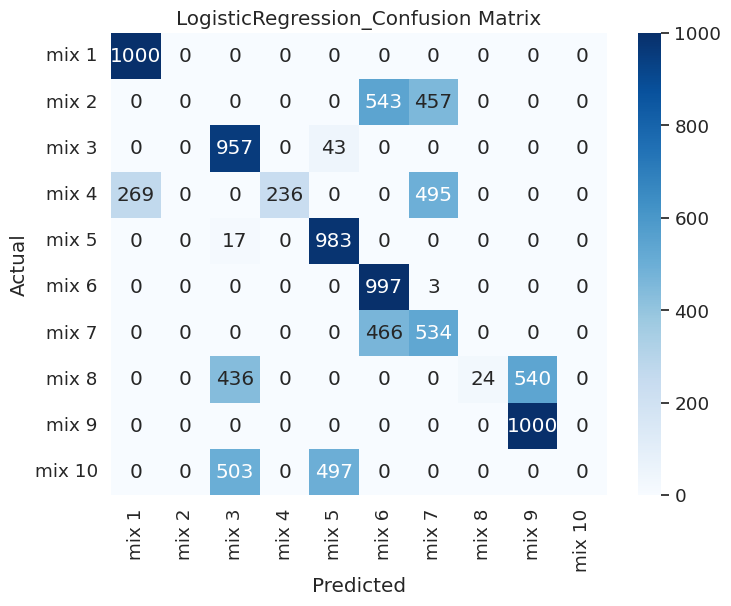

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 定義類別標籤
class_labels = y_train

# 使用Seaborn熱圖（heatmap）繪製混淆矩陣
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # 設定字體大小

# 繪製混淆矩陣熱圖
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# 設定圖形標題和軸標籤
plt.title('LogisticRegression_Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 保存成PNG檔案
plt.savefig('/content/drive/MyDrive/Lab/DeepRaman/data/static_confusion_matrix_lg.png', format='png', dpi=300)

# 顯示圖形
plt.show()

**4.LDA**

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import csv
import copy

# 如果是混合數據進行訓練
# 訓練
datafile0 = '/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/lda_unknown_ratio_data.csv'

datafile1 = u'/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/lda_training_unknown_data.npy'
# datafile1 = u'/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_new/testing_unknown_corr.npy'
# 測試
datafile2 = '/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/testing_unknown_data.csv'
# datafile2 = '/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_new/testing_unknown_data_corr.csv'

datafile3 = '/content/drive/MyDrive/Lab/Senior_project/SERS bead data/data_ver3/unknown_ratio_data.csv'
with open(datafile3, 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.reader(csvfile)
data_4 = pd.read_csv(datafile3, encoding='utf-8')
data_4 = np.array(data_4)
real_labels = data_4[:, 0]
print(real_labels)

with open(datafile0, 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.reader(csvfile)
data_1 = pd.read_csv(datafile0, encoding='utf-8')
data_1 = np.array(data_1)
y_train = data_1[:, 0]

X_train_ini = np.load(datafile1, allow_pickle=True)
X_train_ini = np.array([sublist[:] for sublist in X_train_ini])  # 使用列表切片去掉每个子列表的第一个元素

X_train = copy.deepcopy(X_train_ini)

print(X_train)

with open(datafile2, 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.reader(csvfile)
data_2 = pd.read_csv(datafile2, encoding='utf-8')
data_2 = np.array(data_2)
# np.random.shuffle(data_2)
y_test = data_2[:, 0]
X_test_ini = data_2[:, 1:]

X_test = copy.deepcopy(X_test_ini)

print(X_test)
print(y_train)

print(y_train.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

# 創建分類器
lda = LinearDiscriminantAnalysis()

# 在數據上擬合LDA模型
lda.fit(X_train, y_train)

# 預測新的光譜樣本屬於哪個類別
y_pred = lda.predict(X_test)

['mix 1' 'mix 2' 'mix 3' 'mix 4' 'mix 5' 'mix 6' 'mix 7' 'mix 8' 'mix 9'
 'mix 10']
[[0.07820948 0.08846245 0.0829237  ... 0.06363842 0.05965624 0.05870533]
 [0.08555208 0.09676763 0.09070889 ... 0.06961304 0.06525699 0.06421681]
 [0.08166284 0.09236853 0.08658522 ... 0.06644839 0.06229038 0.06129748]
 ...
 [0.07820711 0.0859124  0.07774671 ... 0.07007529 0.07567454 0.06086827]
 [0.04568273 0.05018358 0.04541379 ... 0.04093272 0.04420339 0.03555468]
 [0.07995157 0.08782873 0.07948089 ... 0.07163836 0.07736251 0.06222598]]
[[0.0914895786359689 0.1156792810667917 0.0675728099891438 ...
  0.1133361314263752 0.0743451689639328 0.0463382808646437]
 [0.0504760281019846 0.0597540305161297 0.0582015815760651 ...
  0.0461912723416954 0.0325108737381451 0.0323886467094079]
 [0.0988370560359892 0.144131825888145 0.104254231977295 ...
  0.0514559672975018 0.1054138646988694 0.1189714037104595]
 ...
 [0.1102143157107908 0.1204125028951638 0.0854154643866738 ...
  0.0637688924741209 0.10238251673378

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print(y_pred)
print(real_labels)
print(y_test)

# 獲得每個混合光譜屬於每個類別的概率分佈
probabilities = lda.predict_proba(X_test)
# print(probabilities)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion = confusion_matrix(y_test, y_pred, labels=real_labels)

print(f"Accuracy：{accuracy:.4f}")
print(f"Precision：{precision:.4f}")
print(f"Recall：{recall:.4f}")
print(f"F1 score：{f1:.4f}")
print(f"Confusion matrix：\n{confusion}")

['mix 5' 'mix 1' 'mix 5' ... 'mix 5' 'mix 5' 'mix 4']
['mix 1' 'mix 2' 'mix 3' 'mix 4' 'mix 5' 'mix 6' 'mix 7' 'mix 8' 'mix 9'
 'mix 10']
['mix 1' 'mix 1' 'mix 1' ... 'mix 10' 'mix 10' 'mix 10']
Accuracy：0.4767
Precision：0.6606
Recall：0.4767
F1 score：0.5065
Confusion matrix：
[[512   0   0   0 488   0   0   0   0   0]
 [  0 433   4  85  97   0   0   0   0 381]
 [  0   0 558   0 162   0  16 264   0   0]
 [  0   0   3 505 330   0   1   0   0 161]
 [  3   0   0 140 738   0   0   0   1 118]
 [  0 286   0   0  22 221   0   0   0 471]
 [  0  27 187  42  96   0 423   0   0 225]
 [  0   0 272   1 173   0   0 554   0   0]
 [  0   0   0   0 386   0   0   0 599  15]
 [  0 118   0 159 499   0   0   0   0 224]]


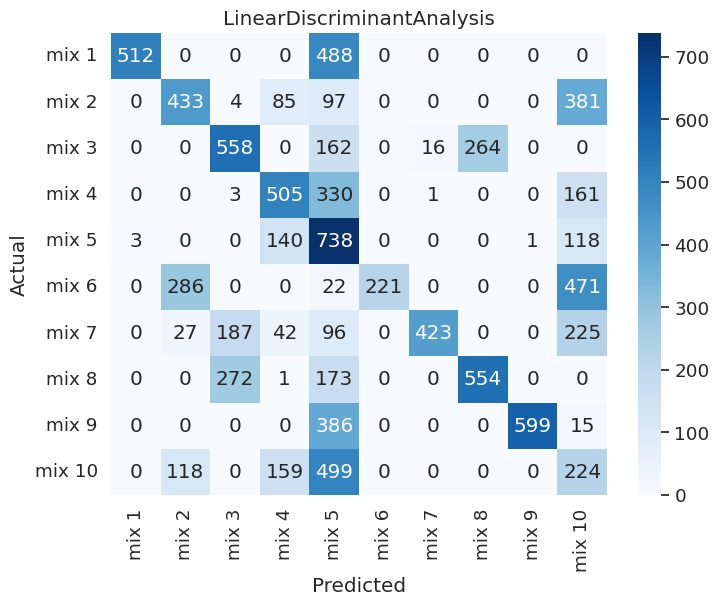

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 定義類別標籤
class_labels = real_labels

# 使用Seaborn熱圖（heatmap）繪製混淆矩陣
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # 設定字體大小

# 繪製混淆矩陣熱圖
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# 設定圖形標題和軸標籤
plt.title('LinearDiscriminantAnalysis')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 保存成PNG檔案
plt.savefig('/content/drive/MyDrive/Lab/DeepRaman/data/static_confusion_matrix_lda.png', format='png', dpi=300)

# 顯示圖形
plt.show()